# Section 1. Data Load

In [2]:
#@title 1.1. Mount google drive 

from google.colab import drive

drive.mount('/content/drive')

%cd /content/drive/MyDrive/DL_medical/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DL_medical


In [3]:
#@title 1.2. Read data from mat/xlsx file

'''
Step 1 : Load datafrom mat files

ADNI_AD     : numpy array [ 32 x 116 x 5937] Disease / Alzheimer's Disease
ADNI_MCI_C  : numpy array [ 22 x 116 x 5937] Disease / Mild Cognitive Impairment / Converter
ADNI_MCI_NC : numpy array [ 26 x 116 x 5937] Disease / Mild Cognitive Impairment / Non-converter
ADNI_CN     : numpy array [ 32 x 116 x 5937] Healthy / Normal                    / Old
SNU_CN      : numpy array [ 38 x  93 x 5937] Healthy / Normal                    / Young to old

ADNI_data   : numpy array [112 x 116 x 5937]

age_mmse    : numpy array [150 x   2]        1st row : age, 2nd row : mmse score
'''
import os
import torch
import scipy.io

import numpy as np
import pandas as pd

ADNI_CN_list = ['002_S_0295', '002_S_0413', '002_S_0685', '002_S_1261', '002_S_1280', 
                '002_S_4213', '002_S_4225', '002_S_4264', '002_S_4270', '006_S_4150', 
                '006_S_4357', '006_S_4449', '006_S_4485', '010_S_4442', '012_S_4026', 
                '012_S_4643', '013_S_4579', '013_S_4580', '013_S_4616', '018_S_4257', 
                '018_S_4313', '018_S_4349', '018_S_4399', '018_S_4400', '019_S_4367', 
                '031_S_4032', '031_S_4218', '031_S_4474', '031_S_4496', '053_S_4578', 
                '136_S_4269', '136_S_4433']

ADNI_MCI_NC_list = ['002_S_2073', '002_S_4229', '002_S_4237', '002_S_4447', '002_S_4473', 
                    '002_S_4654', '012_S_4128', '013_S_2389', '013_S_4395', '013_S_4917', 
                    '018_S_4868', '019_S_4285', '019_S_4548', '031_S_2018', '031_S_2022', 
                    '031_S_2233', '031_S_4029', '031_S_4590', '053_S_0919', '053_S_2357', 
                    '053_S_4557', '053_S_4813', '130_S_4405', '130_S_4417', '130_S_4468', 
                    '130_S_4817']

ADNI_MCI_C_list = ['002_S_4171', '002_S_4521', '006_S_4346', '006_S_4363', '006_S_4515', 
                   '012_S_4094', '012_S_4188', '013_S_1186', '013_S_4595', '019_S_4293', 
                   '019_S_4680', '031_S_4005', '031_S_4042', '031_S_4149', '031_S_4721', 
                   '130_S_2373', '130_S_2391', '130_S_2403', '130_S_4250', '130_S_4294', 
                   '130_S_4415', '130_S_4542']

ADNI_AD_list = ['002_S_5018', '006_S_4153', '006_S_4192', '006_S_4546', '006_S_4867', 
                '013_S_5071', '018_S_4696', '018_S_4733', '018_S_5240', '019_S_4252', 
                '019_S_4477', '019_S_4549', '019_S_5012', '019_S_5019', '031_S_4024', 
                '053_S_5070', '053_S_5208', '100_S_5106', '130_S_4589', '130_S_4641', 
                '130_S_4660', '130_S_4730', '130_S_4971', '130_S_4982', '130_S_4984', 
                '130_S_4990', '130_S_4997', '130_S_5006', '130_S_5059', '130_S_5231', 
                '131_S_5138', '136_S_4993']

SNU_CN_list = ['06', '07', '08', '09', '10', 
               '11', '12', '13', '14', '15', 
               '16', '18', '19', '20', '21', 
               '22', '23', '25', '26', '27', 
               '28', '29', '30', '31', '33', 
               '35', '36', '38', '39', '40', 
               '41', '43', '44', '45', '46', 
               '48', '49', '51']


ADNI_CN_full = [scipy.io.loadmat(f'Kcore_pos/ADNI_CN/coreness_{i}.mat') for i in ADNI_CN_list]
ADNI_CN_data = [data['coreness_all'] for data in ADNI_CN_full]
ADNI_CN = np.concatenate([np.reshape(np.float32(data.T), [1, -1, 5937]) for data in ADNI_CN_data])

ADNI_MCI_NC_full = [scipy.io.loadmat(f'Kcore_pos/ADNI_MCI_NC/coreness_{i}.mat') for i in ADNI_MCI_NC_list]
ADNI_MCI_NC_data = [data['coreness_all'] for data in ADNI_MCI_NC_full]
ADNI_MCI_NC = np.concatenate([np.reshape(np.float32(data.T), [1, -1, 5937]) for data in ADNI_MCI_NC_data])

ADNI_MCI_C_full = [scipy.io.loadmat(f'Kcore_pos/ADNI_MCI_C/coreness_{i}.mat') for i in ADNI_MCI_C_list]
ADNI_MCI_C_data = [data['coreness_all'] for data in ADNI_MCI_C_full]
ADNI_MCI_C = np.concatenate([np.reshape(np.float32(data.T), [1, -1, 5937]) for data in ADNI_MCI_C_data])

ADNI_AD_full = [scipy.io.loadmat(f'Kcore_pos/ADNI_AD/coreness_{i}.mat') for i in ADNI_AD_list]
ADNI_AD_data = [data['coreness_all'] for data in ADNI_AD_full]
ADNI_AD = np.concatenate([np.reshape(np.float32(data.T), [1, -1, 5937]) for data in ADNI_AD_data])

SNU_CN_full = [scipy.io.loadmat(f'Kcore_pos/SNU_CN/coreness_normPM{i}.mat') for i in SNU_CN_list]
SNU_CN_data = [data['coreness_all'] for data in SNU_CN_full]
SNU_CN = np.concatenate([np.reshape(np.float32(data.T), [1, -1, 5937]) for data in SNU_CN_data])

age_mmse = np.array(pd.read_excel('Kcore_pos/Age_MMSE.xlsx')[['Age', 'MMSE']])

# concatenate dataset

ADNI_data = np.concatenate([ADNI_CN, ADNI_MCI_NC, ADNI_MCI_C, ADNI_AD])

In [4]:
#@title 1.3.1. Define subject-level numpy array data

'''
Step 2 : Define subject-level numpy array
Also, since the maximum value in ADNI_data and SNU_CN is 612, we scale the data by multiplying 0.001. 

subject_data    : numpy array [150 x  93 x 5937]
subject_age     : numpy array [150,]
subject_mmse    : numpy array [150,]

normal_data     : numpy array [ 70 x  93 x 5937]
normal_age      : numpy array [ 70]
normal_mmse     : numpy array [ 70]


patient_data     : numpy array [ 80 x  93 x 5937]
patient_age      : numpy array [ 80]
patient_mmse     : numpy array [ 80]
'''

subject_data = np.concatenate([ADNI_data[:,0:93,:], SNU_CN]) * 0.001

subject_age = age_mmse[:,0]
subject_mmse = age_mmse[:,1]

normal_data = np.concatenate([ADNI_data[0:32, 0:93, :], SNU_CN]) * 0.001
normal_age  = np.concatenate([subject_age[0:32],  subject_age[112:150] ])
normal_mmse = np.concatenate([subject_mmse[0:32], subject_mmse[112:150]])

patient_data = subject_data[32:112]
patient_age = subject_age[32:112]
patient_mmse = subject_mmse[32:112]

In [5]:
#@title 1.3.2. Convert to torch tensor

'''
Step 4. Convert to torch tensor

subject_data_torch    : torch tensor [150 x  93 x 5937]
subject_age_torch     : torch tensor [150,]
subject_mmse_torch    : torch tensor [150,]

normal_data_torch     : torch tensor [70 x   93 x 5937]
normal_age_torch      : torch tensor [70]
nromal_mmse_torch     : torch tensor [70]

patient_data_torch     : torch tensor [80 x   93 x 5937]
patient_age_torch      : torch tensor [80]
patient_mmse_torch     : torch tensor [80]
'''

import torch

subject_data_torch = torch.tensor(subject_data).float()
subject_age_torch = torch.tensor(subject_age).float()
subject_mmse_torch = torch.tensor(subject_mmse).float()

normal_data_torch = torch.tensor(normal_data).float()
normal_age_torch  = torch.tensor(normal_age).float()
normal_mmse_torch = torch.tensor(normal_mmse).float()

patient_data_torch = torch.tensor(patient_data).float()
patient_age_torch = torch.tensor(patient_age).float()
patient_mmse_torch = torch.tensor(patient_mmse).float()


In [6]:
#@title 1.4.1. Define sequence-level numpy data

seq_data = np.concatenate([
    ADNI_data[:, 0:110, :].reshape(-1, 10, 5937), 
    SNU_CN[:, 0:90, :].reshape(-1, 10, 5937)
    ]) * 0.001

seq_age = np.repeat(subject_age, np.repeat([11, 9], [112, 38]))
seq_mmse = np.repeat(subject_mmse, np.repeat([11, 9], [112, 38]))

seq_normal_data = np.concatenate([seq_data[0:352],  seq_data[1232:1574]])
seq_normal_age  = np.concatenate([seq_age[0:352],  seq_age[1232:1574]])
seq_normal_mmse = np.concatenate([seq_mmse[0:352], seq_mmse[1232:1574]])

seq_patient_data = seq_data[352:1232]
seq_patient_age = seq_age[352:1232]
seq_patient_mmse = seq_mmse[352:1232]


In [7]:
#@title 1.4.2. Convert to torch tensor

seq_data_torch = torch.tensor(seq_data).float()
seq_age_torch = torch.tensor(seq_age).float()
seq_mmse_torch = torch.tensor(seq_mmse).float()

seq_normal_data_torch = torch.tensor(seq_normal_data).float()
seq_normal_age_torch  = torch.tensor(seq_normal_age).float()
seq_normal_mmse_torch = torch.tensor(seq_normal_mmse).float()

seq_patient_data_torch = torch.tensor(seq_patient_data).float()
seq_patient_age_torch = torch.tensor(seq_patient_age).float()
seq_patient_mmse_torch = torch.tensor(seq_patient_mmse).float()

# Section 2. Normal age prediction

In [8]:
#@title 2.1. Define torch dataset

from torch.utils.data import DataLoader
from util_230505 import MYTensorDataset

subj_normal_age_dataset = MYTensorDataset(normal_data_torch, normal_age_torch, normal_mmse_torch)
subj_patient_age_dataset = MYTensorDataset(patient_data_torch, patient_age_torch, patient_mmse_torch)

seq_normal_age_dataset = MYTensorDataset(seq_normal_data_torch, seq_normal_age_torch, seq_normal_mmse_torch)
seq_patient_age_dataset = MYTensorDataset(seq_patient_data_torch, seq_patient_age_torch, seq_patient_mmse_torch)

In [9]:
#@title 2.2. Experiment setup

import time
import random

import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm


from visualize_230505 import loss_plot
from util_230505 import make_reproducibility, make_masking, make_arbitrary_masking, k_fold_index, seq_k_fold_index
from model_230505 import Attention, age_estimator
from train_230505 import age_pretrain



In [10]:
#@title 2.2.1. K-fold CV setup

seq_cum_index = np.concatenate([np.zeros(1), np.cumsum(np.repeat([11, 9], [112, 38]))]).astype(int)
normal_cum_index = np.concatenate([np.zeros(1), np.cumsum(np.repeat([11, 9], [32, 38]))]).astype(int)
patient_cum_index = np.concatenate([np.zeros(1), np.cumsum(np.repeat(9, 80))]).astype(int)

num_fold = 5

subj_normal_ind_list = k_fold_index(N = 70, k = num_fold, SEED = 100)
seq_normal_ind_list = seq_k_fold_index(N_data=694, N_subj = 70, cum_index = normal_cum_index, k=num_fold, SEED = 200)

In [ ]:
#@title 2.2.2. Hyperparameter setup

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
subj_normal_N = 70
seq_normal_N = 694

# optimal yperparameter
learning_rate = 1e-3
weight_decay = 1e-2
num_epoch = 500
subj_normal_batch_size = 8
seq_normal_batch_size = 32
h_dim = 64
num_layers = 2


In [ ]:
#@title 2.3. Training (done)

# # seed
# seed_list = [100 * (i+1) for i in range(10)]

# title = "subj_opt_normal"
# os.makedirs(title, exist_ok=True)
# normal_pred_list_list = []
# normal_train_loss_list_list = []
# normal_test_loss_list_list = []

# for seed in seed_list : 
#     result = age_pretrain(
#         subj_normal_age_dataset, DEVICE, subj_normal_ind_list, SEED = seed, N = 70, 
#         h_dim = h_dim, num_layers = num_layers, num_epoch = num_epoch, batch_size = subj_normal_batch_size, 
#         loss_type = "MSE", learning_rate = learning_rate, weight_decay = weight_decay
#     )
#     normal_pred_list_list.append(result[0])
#     normal_train_loss_list_list.append(result[1])
#     normal_test_loss_list_list.append(result[2])
#     loss_plot(result, num_fold, h_dim, num_layers, num_epoch, learning_rate, seed, title = title)

#     # ### For sequence level training
#     # result = age_pretrain(
#     #     seq_normal_age_dataset, DEVICE, seq_normal_ind_list, SEED = seed, N = 694, 
#     #     h_dim = h_dim, num_layers = num_layers, num_epoch = num_epoch, batch_size = seq_normal_batch_size, 
#     #     loss_type = "MSE", learning_rate = learning_rate, weight_decay = weight_decay
#     # )

#     # loss_plot(result, num_fold, h_dim, num_layers, num_epoch, learning_rate, seed, title = title)

# np.savetxt(f'{title}/pred.csv', torch.concat(normal_pred_list_list).reshape(-1, 70).numpy(), delimiter = ",")
# np.savetxt(f'{title}/train_loss.csv', np.asarray(normal_train_loss_list_list).mean(axis = 1), delimiter = ",")
# np.savetxt(f'{title}/test_loss.csv', np.asarray(normal_test_loss_list_list).mean(axis = 1), delimiter = ",")


In [ ]:
#@title 2.5. Load saved data

title = "subj_opt_normal"
normal_pred_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/pred.csv', header = None))).float()
normal_train_loss_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/train_loss.csv', header = None))).float()
normal_train_loss_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/test_loss.csv', header = None))).float()

# Section 3. Patient age prediction

In [ ]:
#@title 2.1. Define torch dataset (already done)

subj_normal_age_dataset
subj_patient_age_dataset

seq_normal_age_dataset
seq_patient_age_dataset

In [ ]:
#@title 2.2. Training with optimal parameters (done)

# from train_230505 import patient_age_train

# DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# subj_normal_N = 70
# subj_patient_N = 80
# seq_normal_N = 694
# seq_patient_N = 880

# # Training Hyperparameter
# h_dim = 64
# num_layers = 2
# learning_rate = 1e-3
# weight_decay = 1e-2
# num_epoch = 500
# subj_normal_batch_size = 8
# seq_normal_batch_size = 32

# seed_list = [1000 + 100 * i for i in range(10)]

# title = "subj_opt_patient"
# os.makedirs(title, exist_ok=True)
# patient_pred_list_list = []
# patient_train_loss_list_list = []
# patient_test_loss_list_list = []

# for seed in seed_list : 
#     result = patient_age_train(
#         subj_normal_age_dataset, subj_patient_age_dataset, 
#         DEVICE, SEED = seed, N = 80, patient_N = 80,  
#         h_dim = h_dim, num_layers = num_layers, num_epoch = num_epoch, batch_size = subj_normal_batch_size, 
#         loss_type = "MSE", learning_rate = learning_rate, weight_decay = weight_decay
#     )
    
#     patient_pred_list_list.append(result[0])
#     patient_train_loss_list_list.append(result[1])
#     patient_test_loss_list_list.append(result[2])
    
# np.savetxt(f'{title}/pred.csv', torch.concat(patient_pred_list_list).reshape(-1, 80).numpy(), delimiter = ",")
# np.savetxt(f'{title}/train_loss.csv', np.asarray(patient_train_loss_list_list), delimiter = ",")
# np.savetxt(f'{title}/test_loss.csv', np.asarray(patient_test_loss_list_list), delimiter = ",")


In [ ]:
#@title 2.3. Load saved data

title = "subj_opt_patient"
patient_pred_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/pred.csv', header = None))).float()
patient_train_loss_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/train_loss.csv', header = None))).float()
patient_test_loss_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/test_loss.csv', header = None))).float()

/content/drive/MyDrive/DL_medical/visualize_230505.py:149: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (12,9))


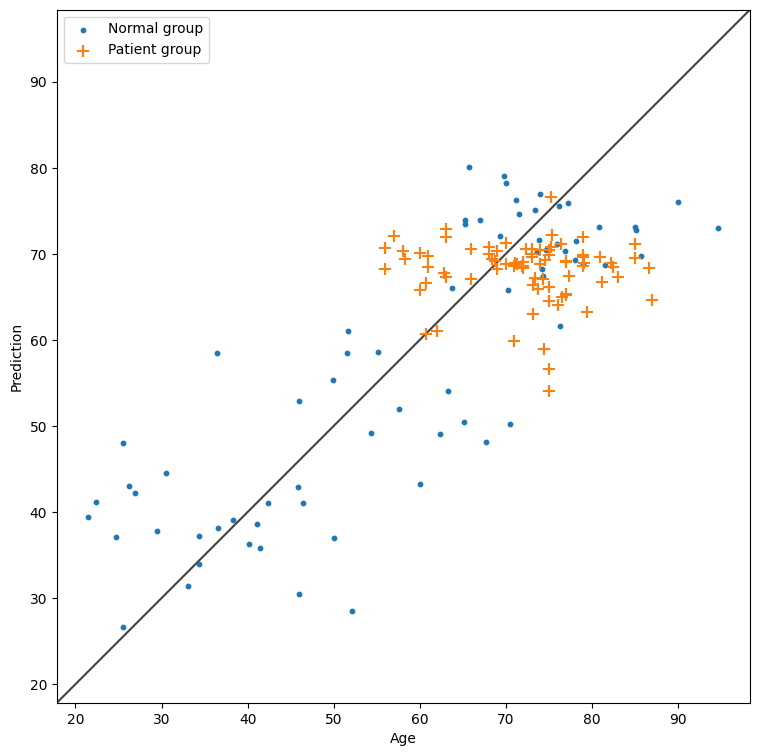

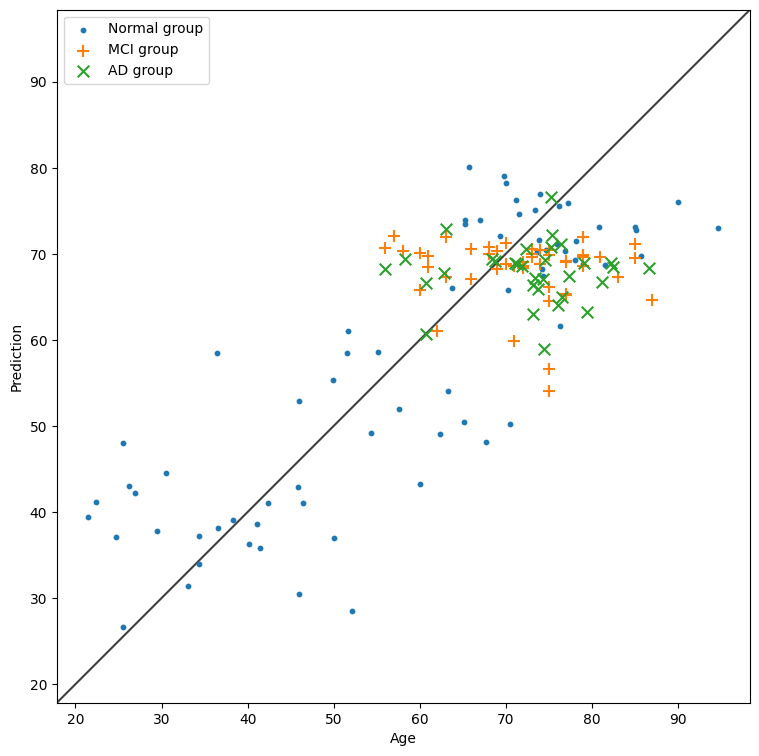

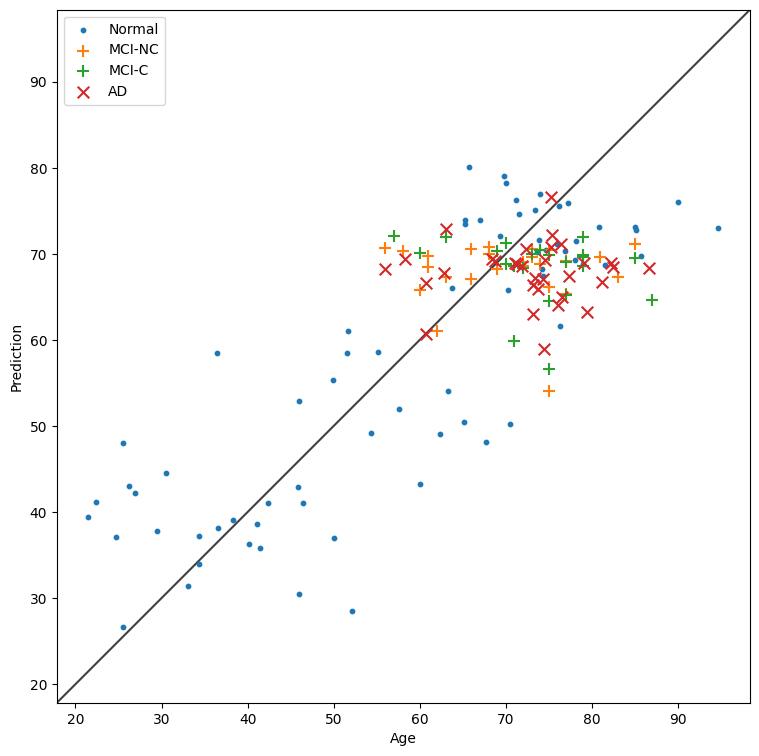

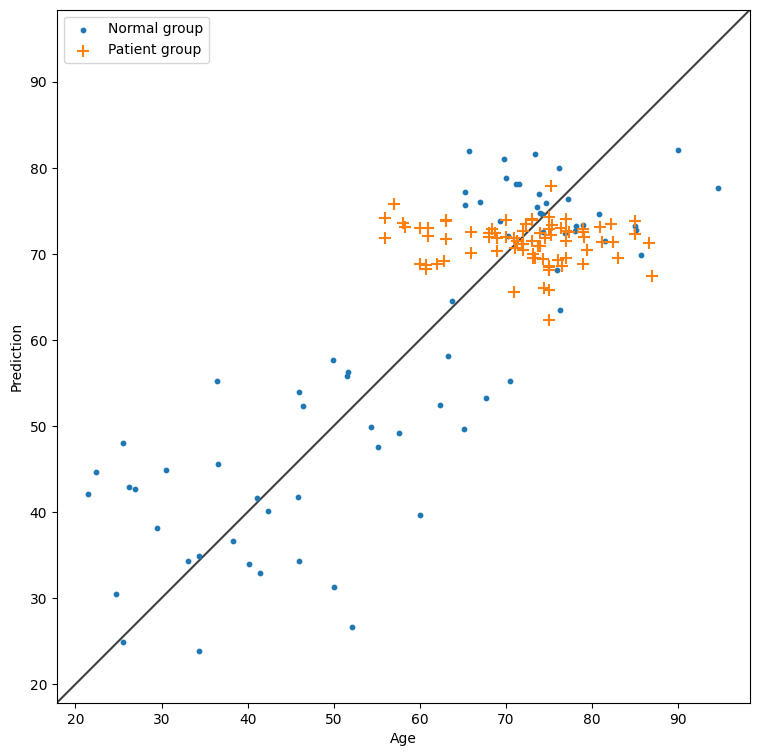

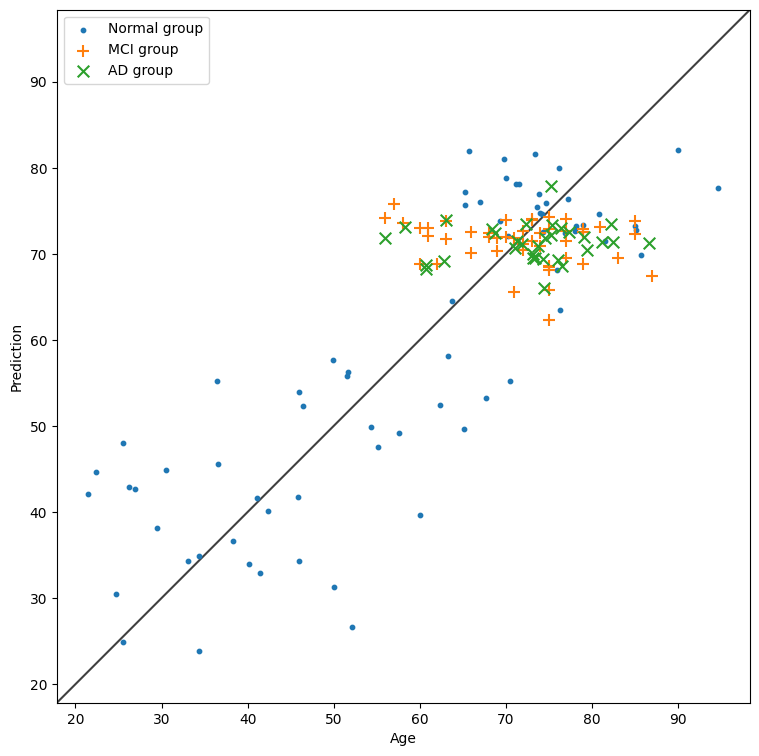

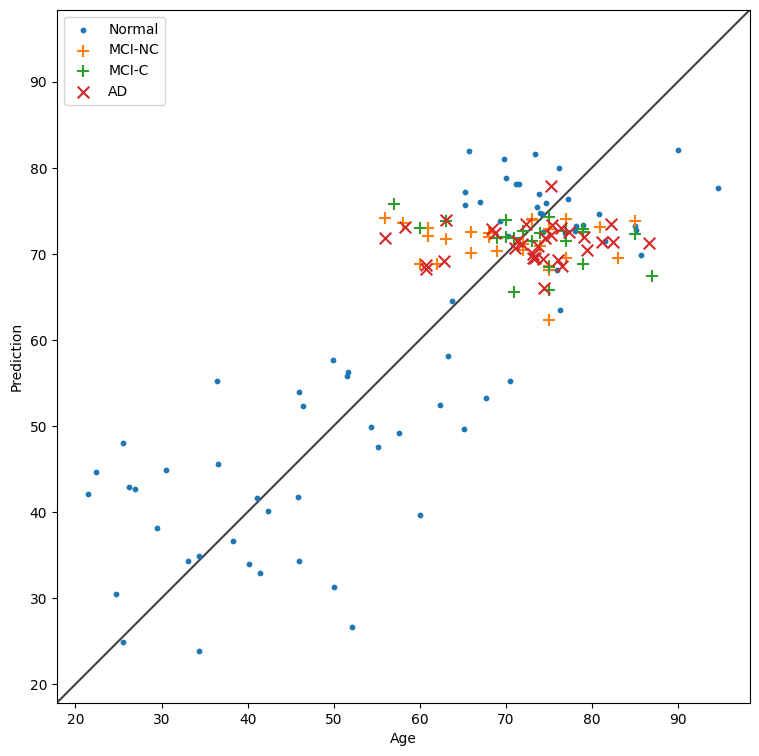

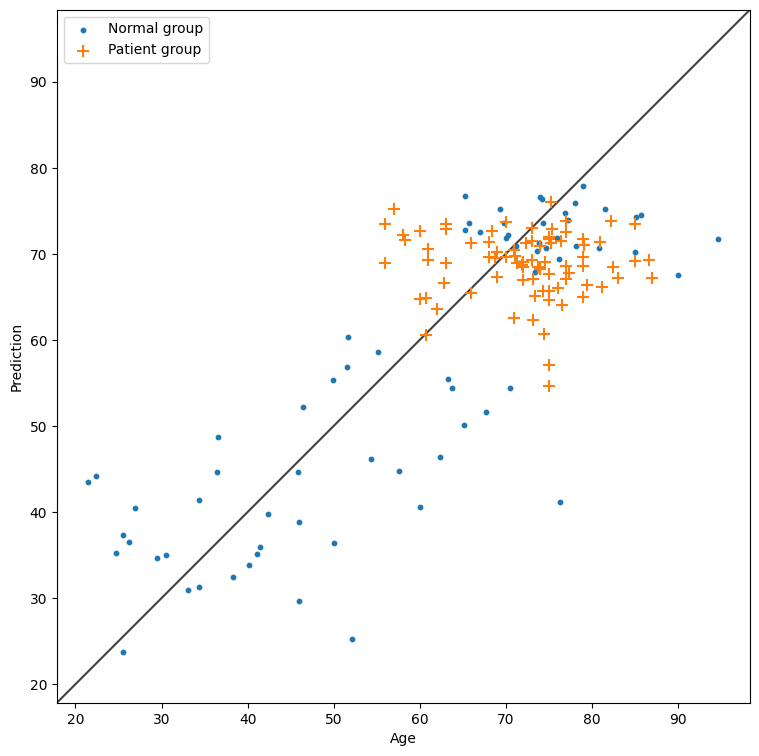

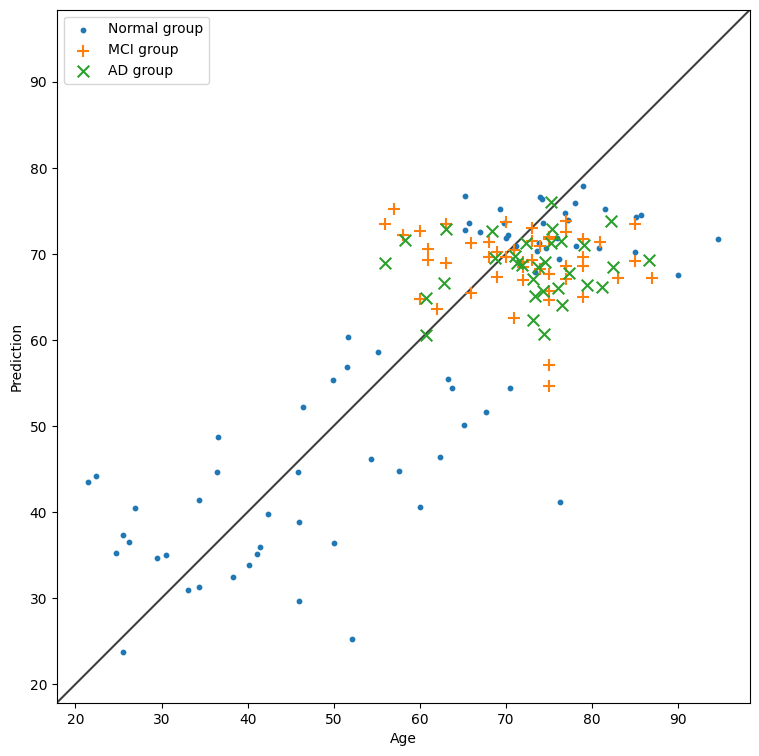

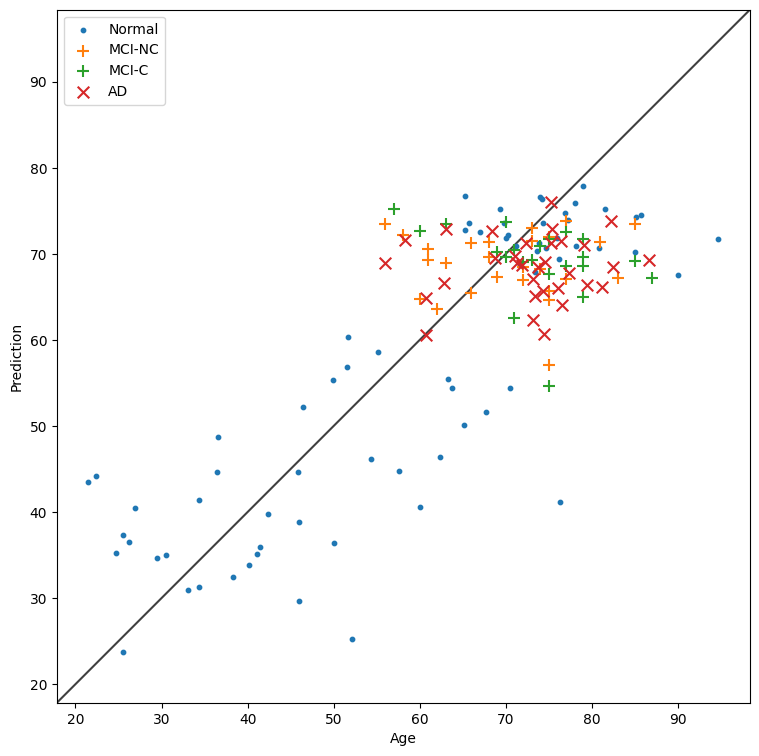

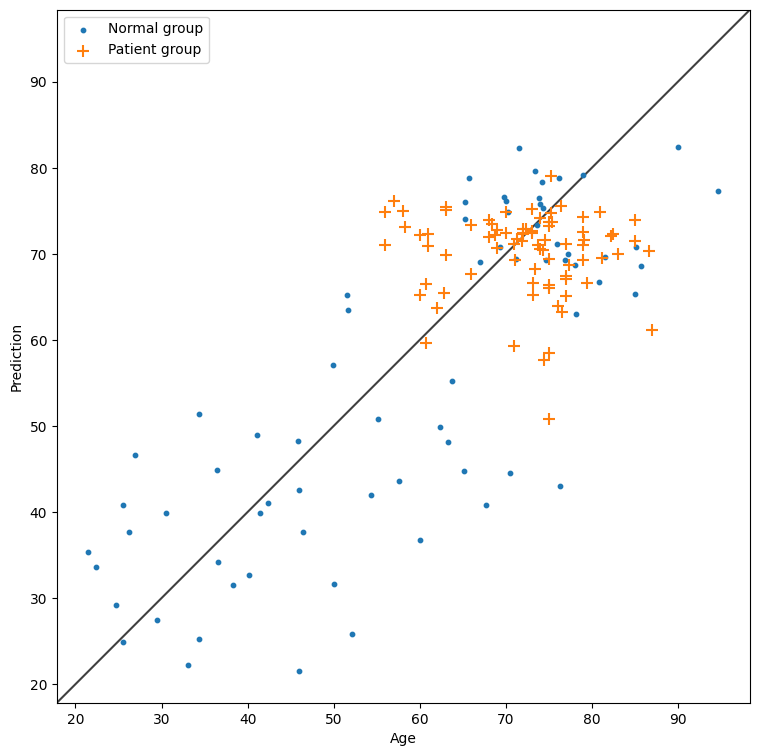

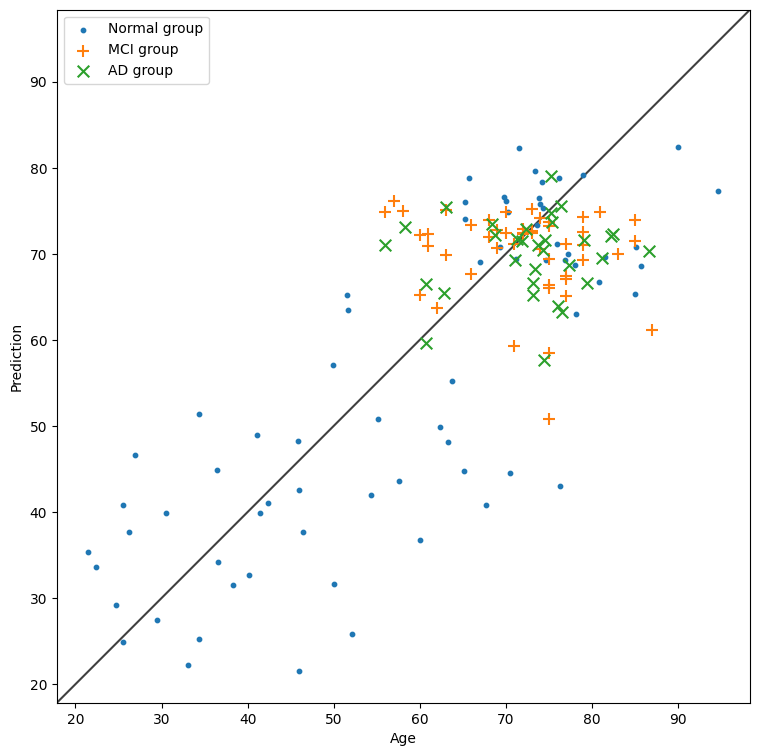

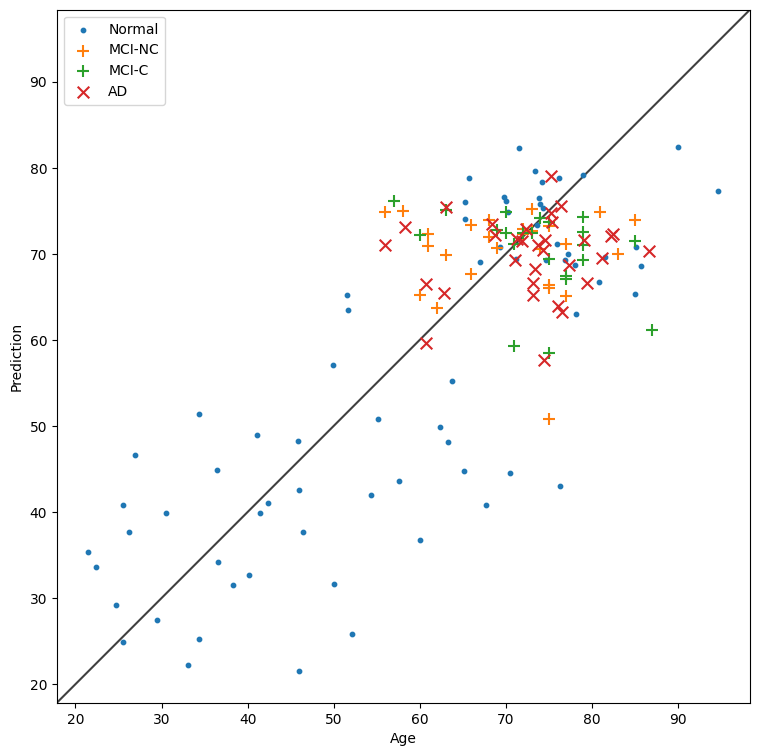

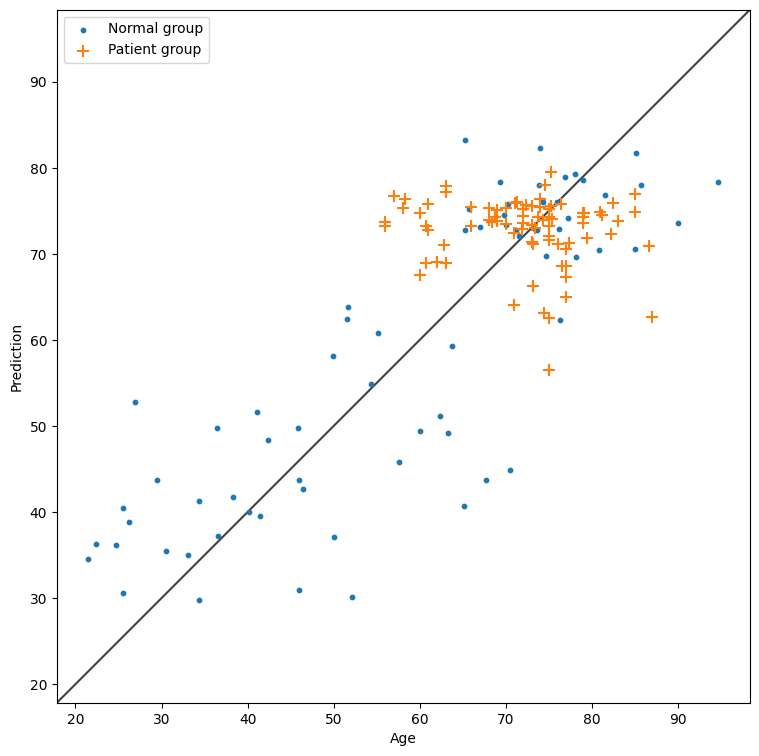

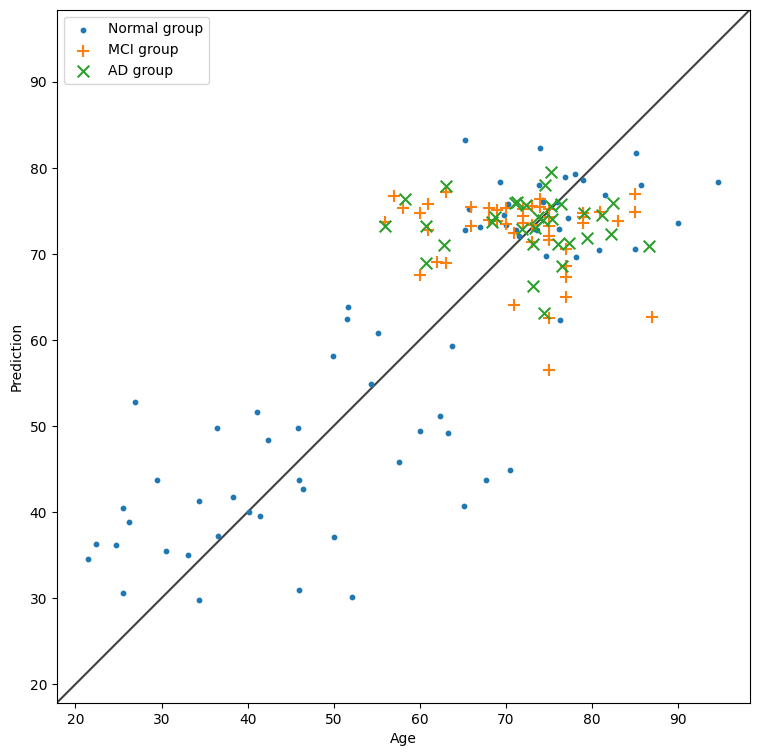

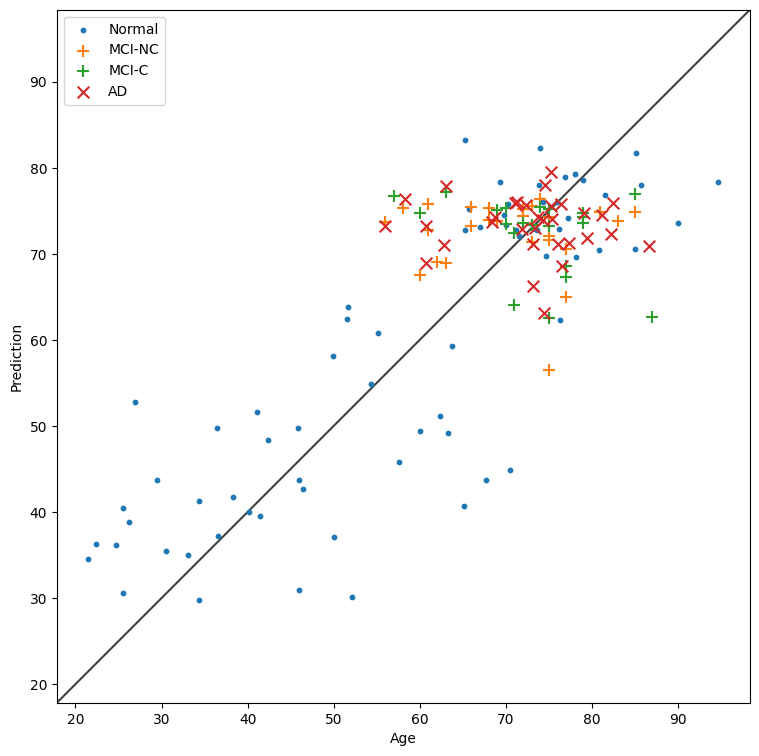

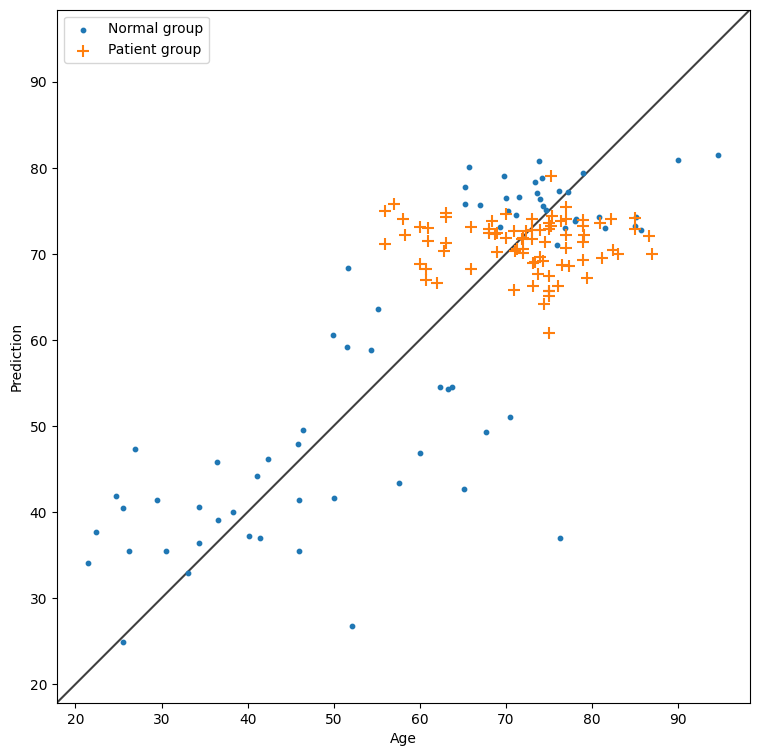

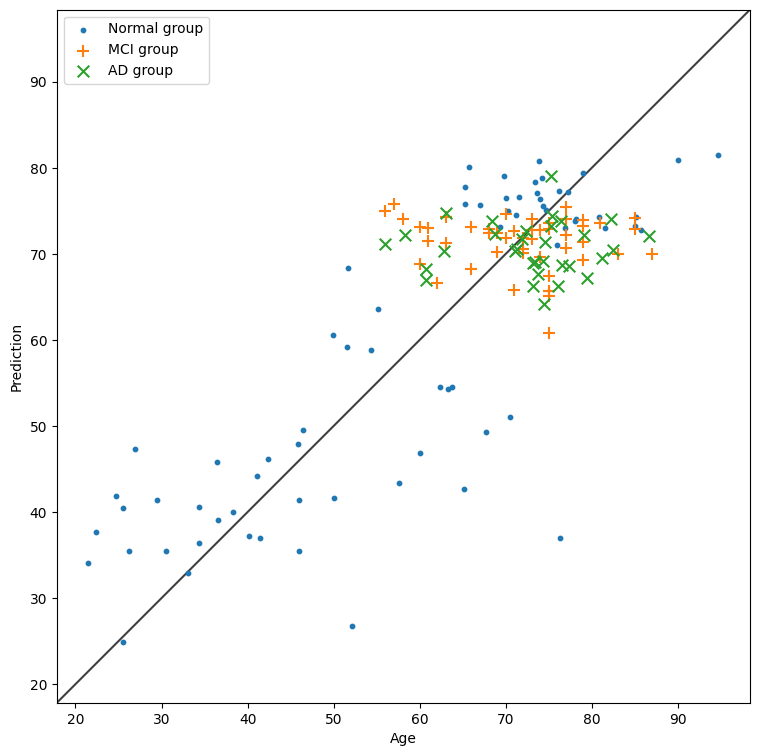

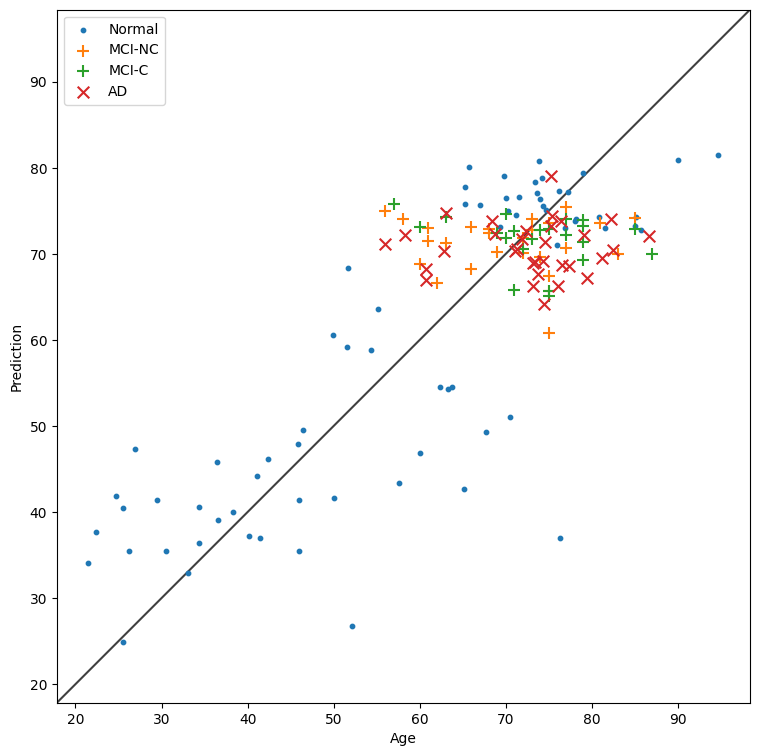

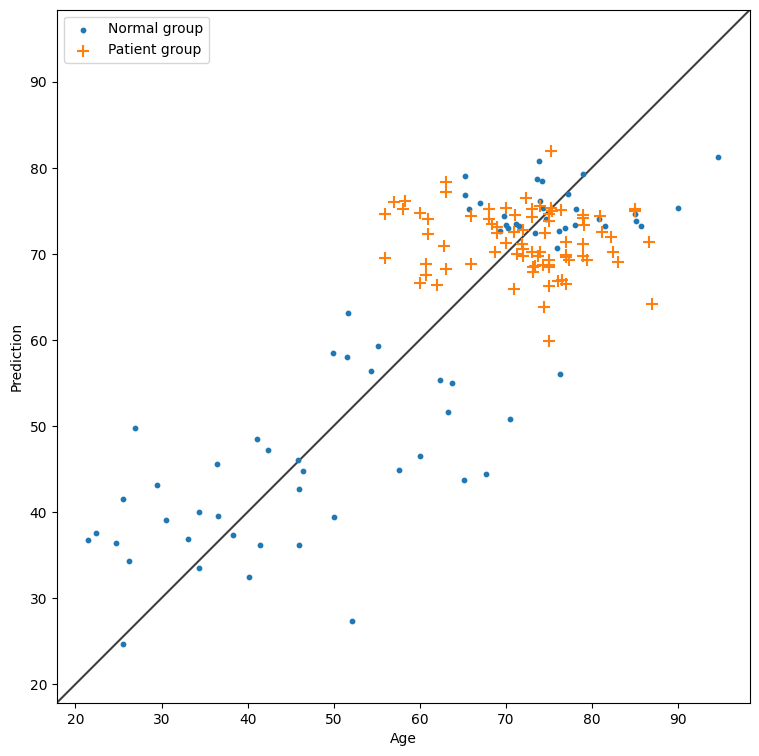

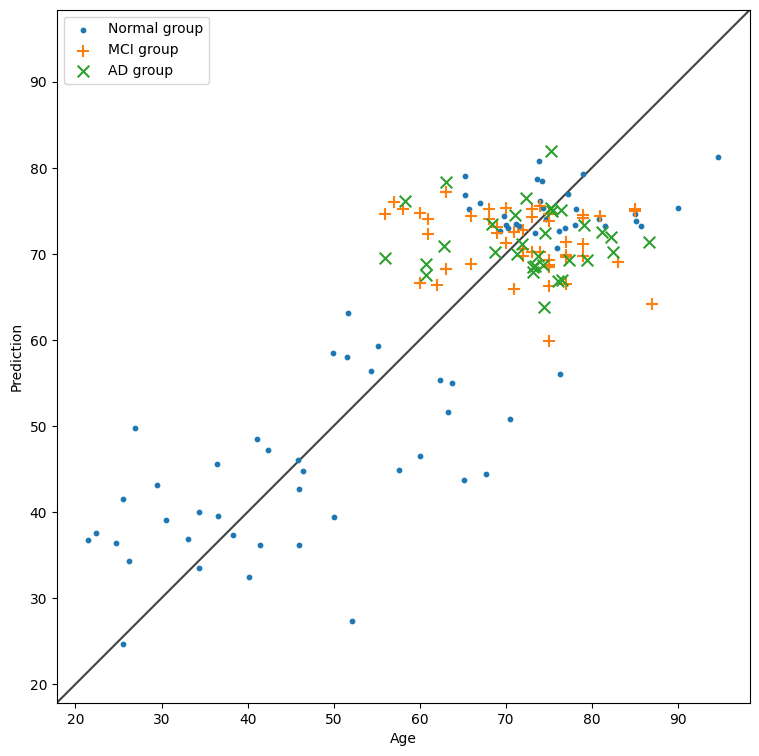

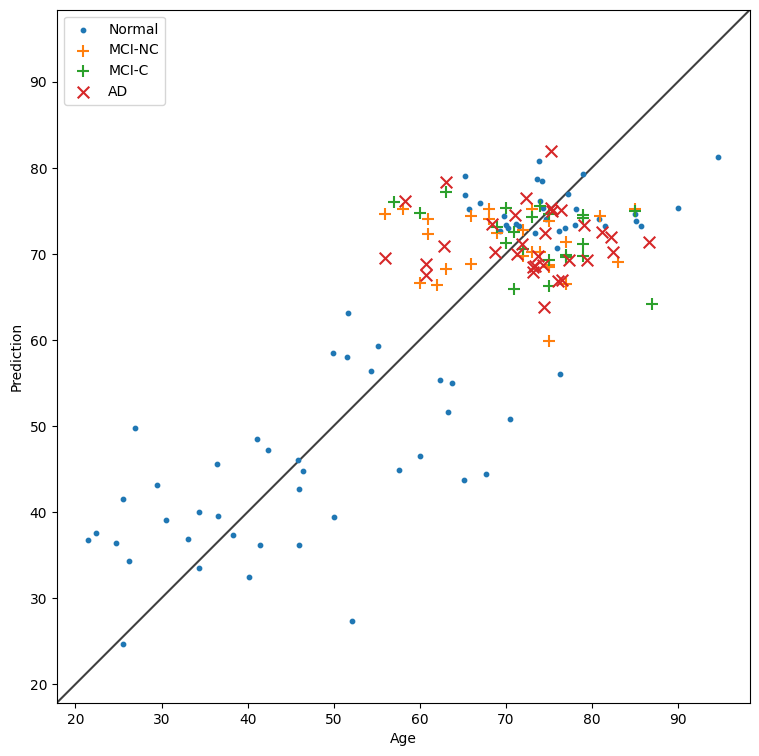

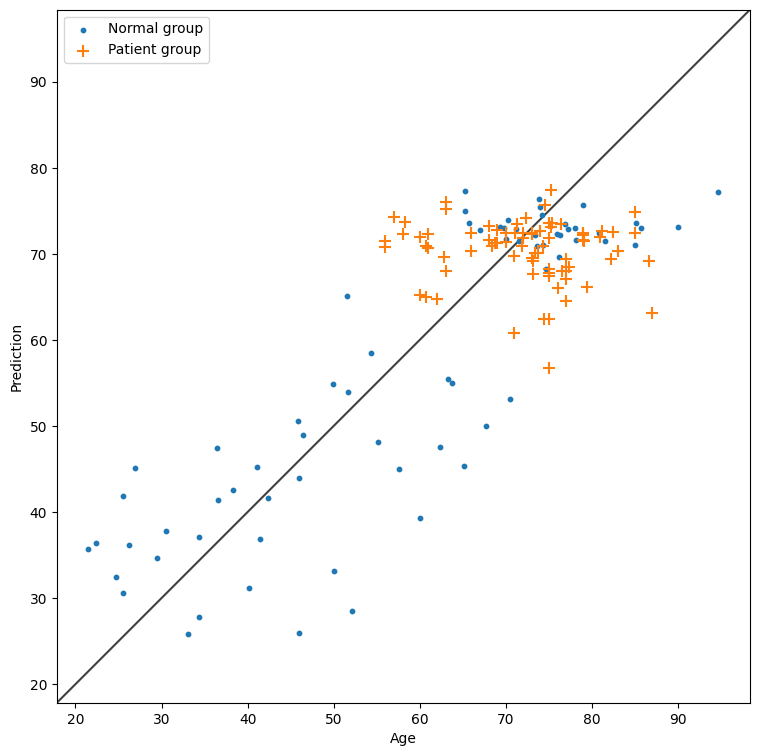

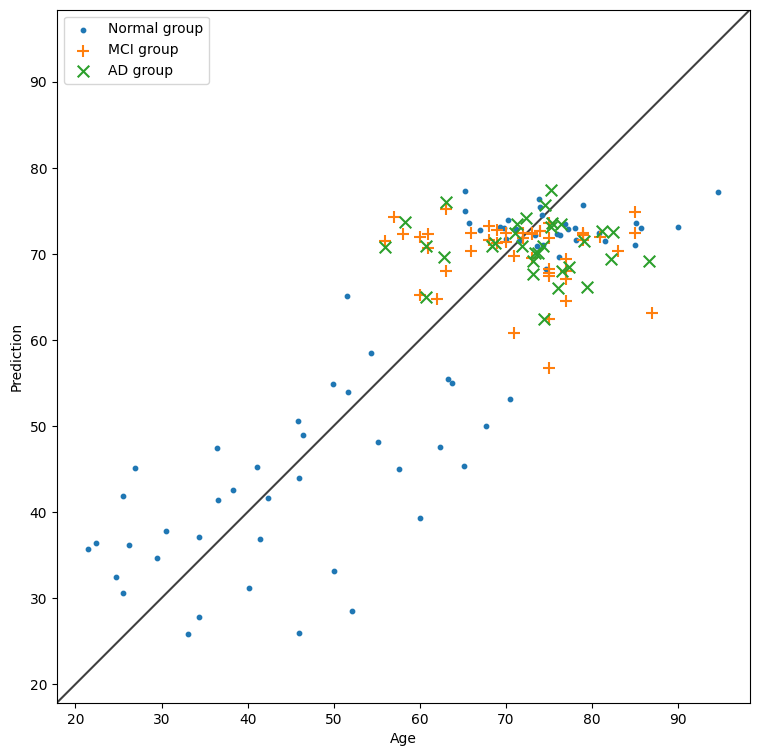

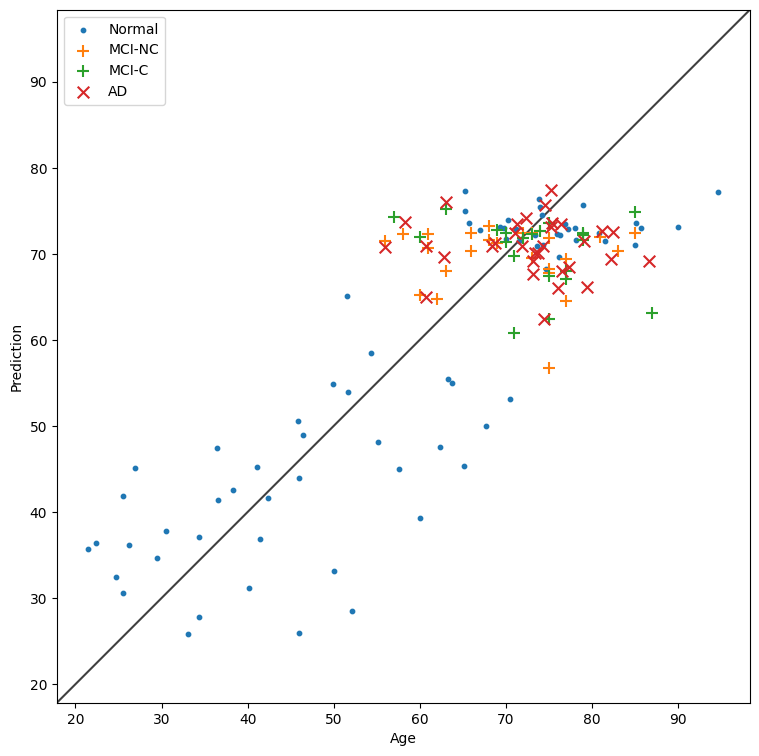

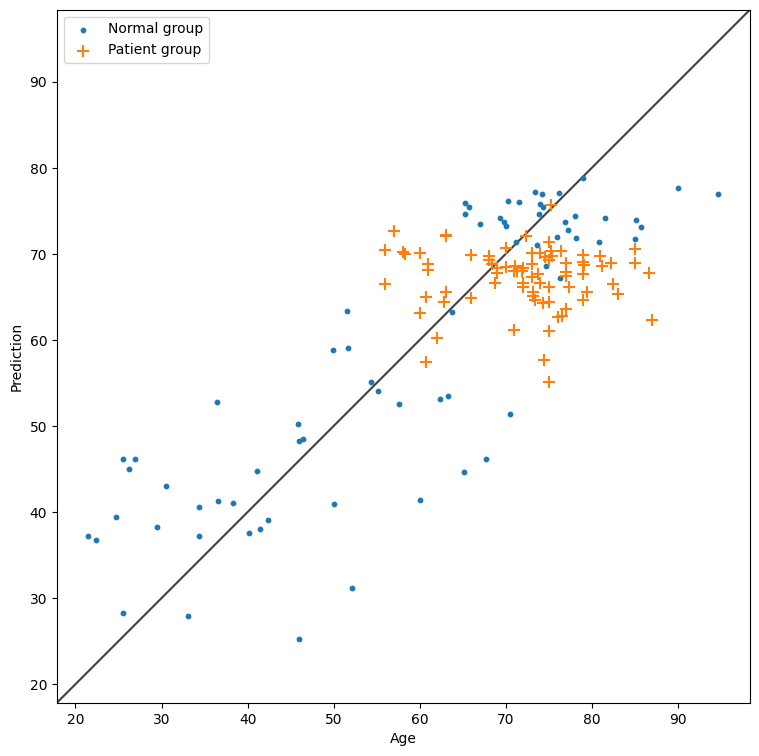

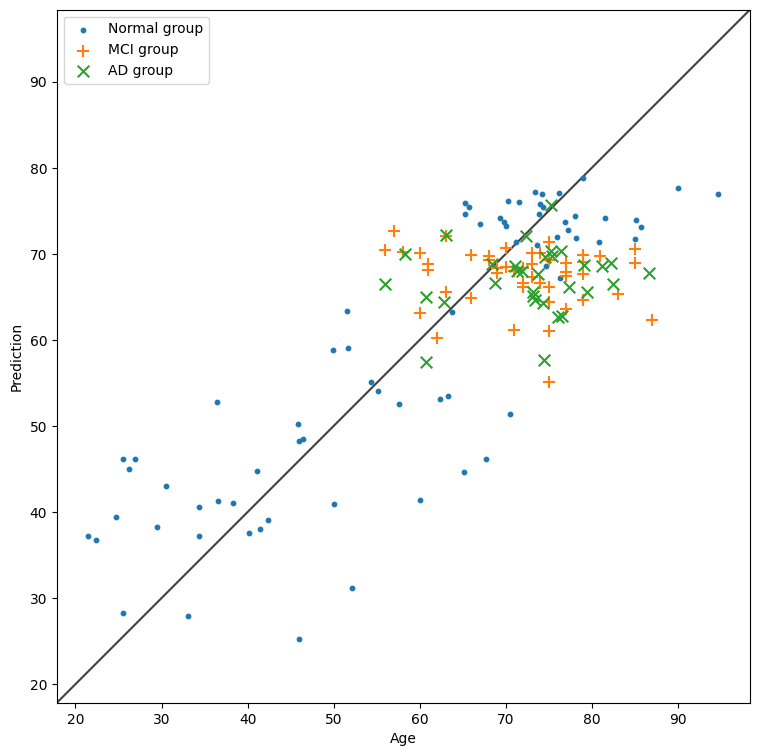

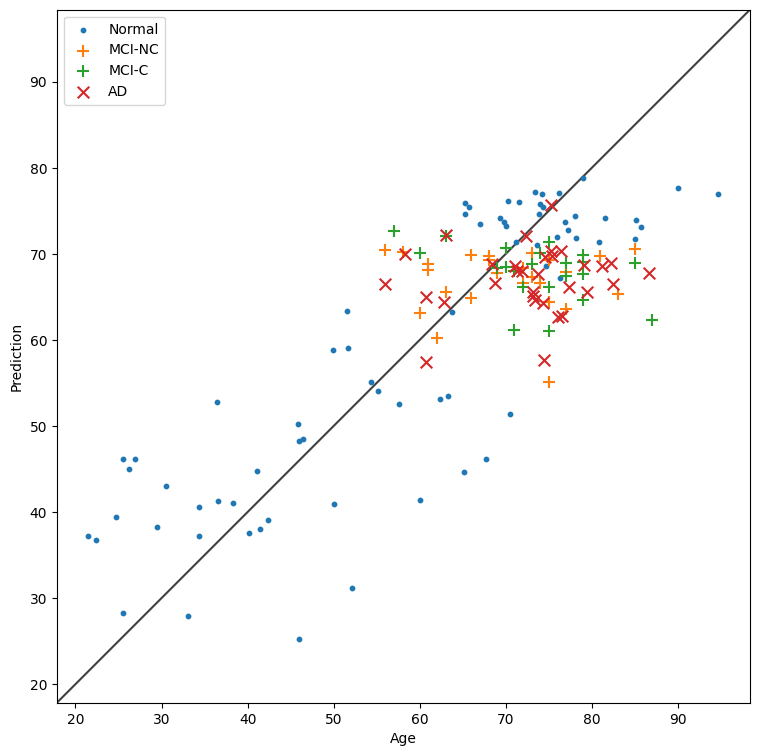

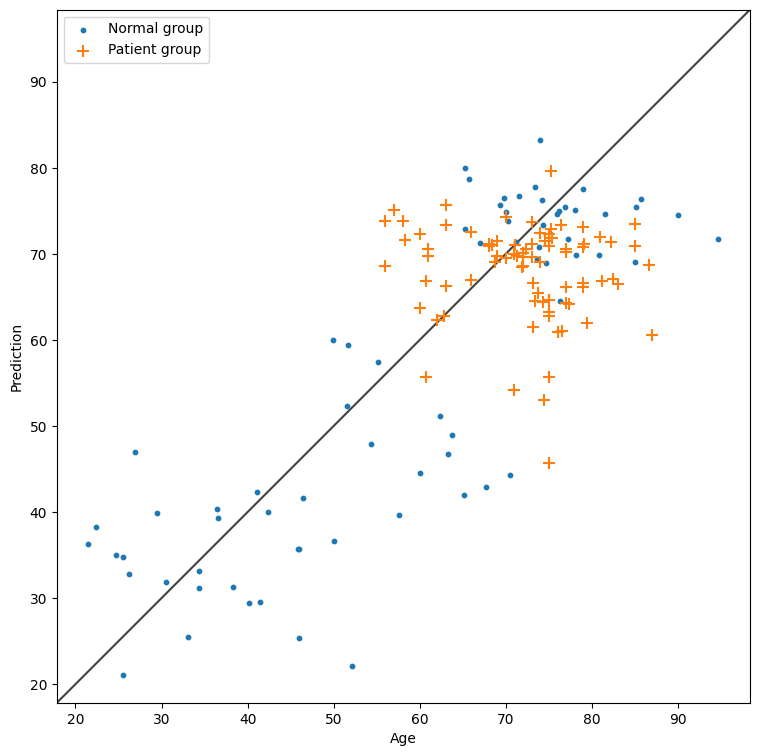

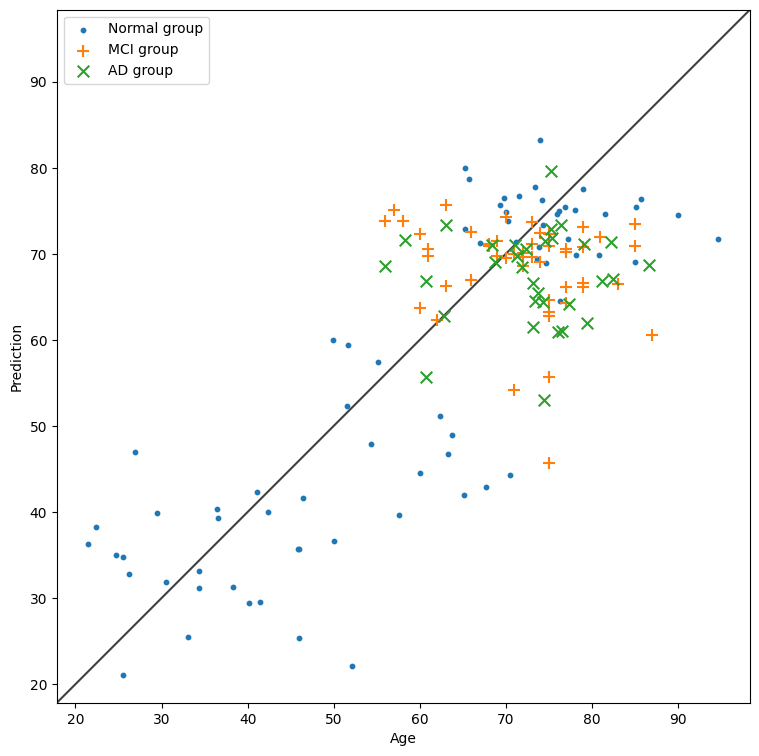

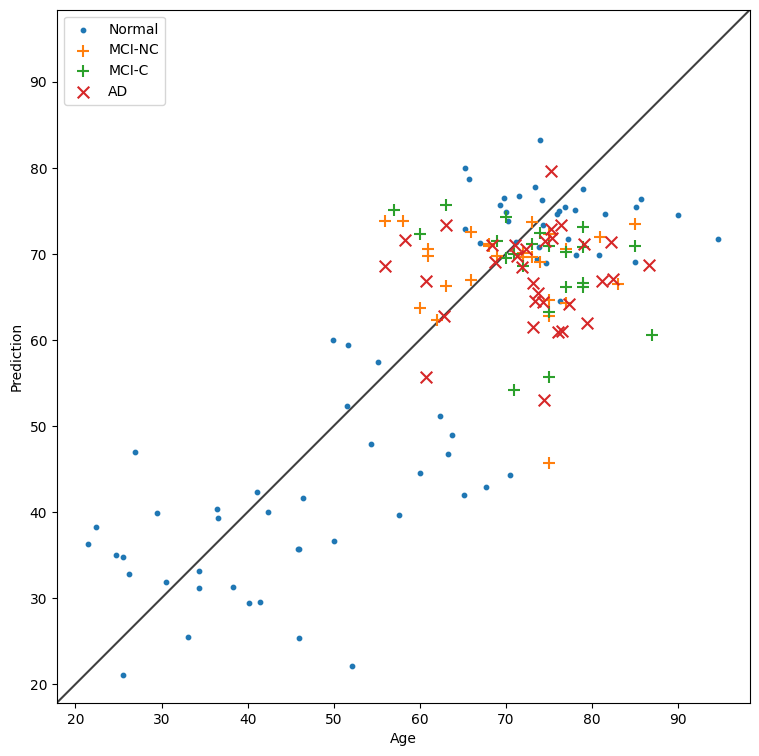

In [ ]:
#@title 2.4. Visualize results
import matplotlib.pyplot as plt
from visualize_230505 import binary_plot, ternary_plot, quaternary_plot

for ind in range(10) : 
    binary_plot(normal_age, patient_age, normal_pred_list_list[ind], patient_pred_list_list[ind], title = f"{title}/subj_model2_binary_{ind}.png")
    ternary_plot(normal_age, patient_age, normal_pred_list_list[ind], patient_pred_list_list[ind], title = f"{title}/subj_model2_ternary_{ind}.png")
    quaternary_plot(normal_age, patient_age, normal_pred_list_list[ind], patient_pred_list_list[ind], title = f"{title}/subj_model2_quaternary_{ind}.png")

# Section 4. Contrast : full train

In [ ]:
#@title 4.1. Define torch dataset

subj_age_dataset = MYTensorDataset(subject_data_torch, subject_age_torch, subject_mmse_torch)
seq_age_dataset = MYTensorDataset(seq_data_torch, seq_age_torch, seq_mmse_torch)

In [ ]:
#@title 4.2. K-fold CV setup

subj_ind_list = k_fold_index(N = 150, k = num_fold, SEED = 300)
seq_ind_list = seq_k_fold_index(N_data=1574, N_subj = 150, cum_index = seq_cum_index, k=num_fold, SEED = 400)

In [ ]:
#@title 4.3. Training (done)

# DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# subj_N = 150
# seq_N = 1574

# # optimal hyperparameter
# h_dim = 64
# num_layers = 2
# learning_rate = 1e-3
# weight_decay = 1e-2
# num_epoch = 500
# subj_batch_size = 8
# seq_batch_size = 32

# seed_list = [2000 + 100 * (i+1) for i in range(10)]


# title = "subj_opt_full"
# os.makedirs(title, exist_ok=True)
# full_pred_list_list = []
# full_train_loss_list_list = []
# full_test_loss_list_list = []

# for seed in seed_list : 
#     result = age_pretrain(
#         subj_age_dataset, DEVICE, subj_ind_list, SEED = seed, N = 150, 
#         h_dim = h_dim, num_layers = num_layers, num_epoch = num_epoch, batch_size = subj_batch_size, 
#         loss_type = "MSE", learning_rate = learning_rate, weight_decay = weight_decay
#     )
#     full_pred_list_list.append(result[0])
#     full_train_loss_list_list.append(result[1])
#     full_test_loss_list_list.append(result[2])
#     loss_plot(result, num_fold, h_dim, num_layers, num_epoch, learning_rate, seed, title = title)

# np.savetxt(f'{title}/pred.csv', torch.concat(full_pred_list_list).reshape(-1, 150).numpy(), delimiter = ",")
# np.savetxt(f'{title}/train_loss.csv', np.asarray(full_train_loss_list_list).mean(axis = 1), delimiter = ",")
# np.savetxt(f'{title}/test_loss.csv', np.asarray(full_test_loss_list_list).mean(axis = 1), delimiter = ",")


In [ ]:
#@title 4.4. Load trained data

title = "subj_opt_full"
full_pred_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/pred.csv', header = None))).float()
full_train_loss_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/train_loss.csv', header = None))).float()
full_test_loss_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/test_loss.csv', header = None))).float()

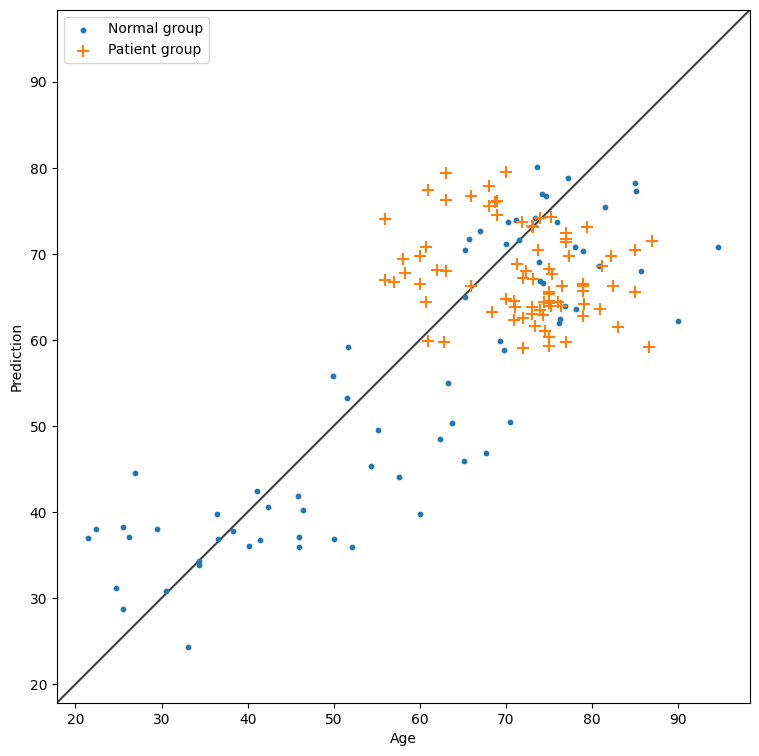

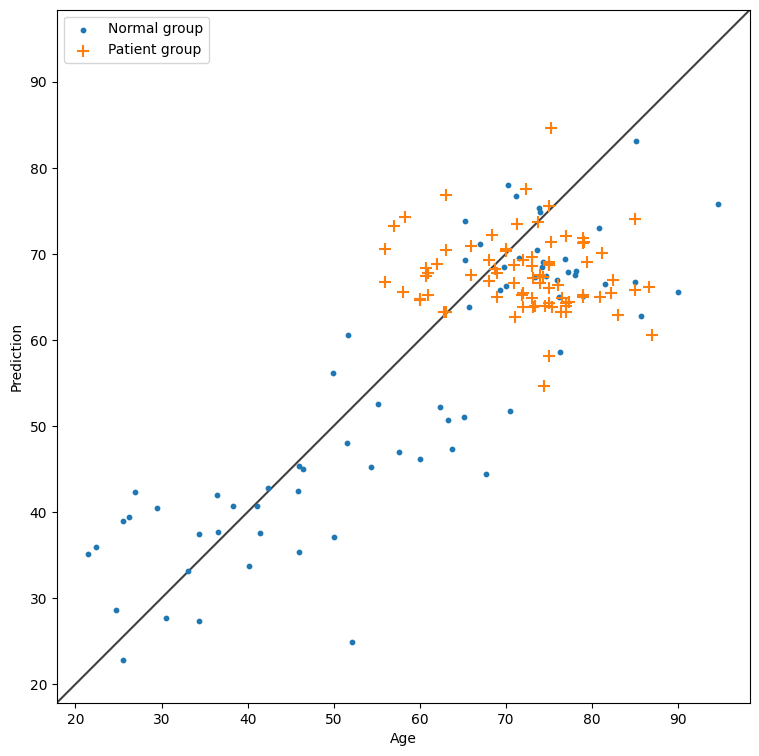

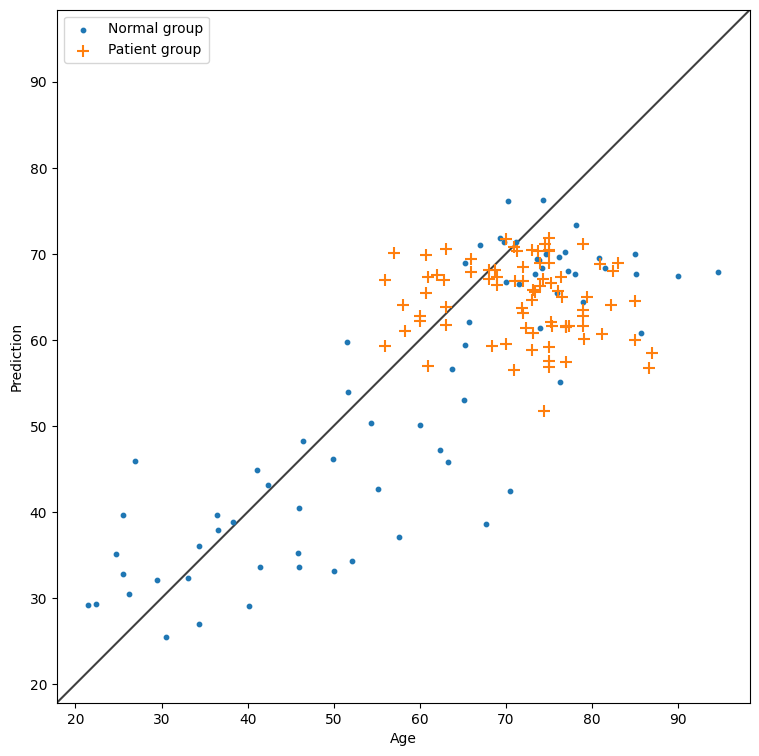

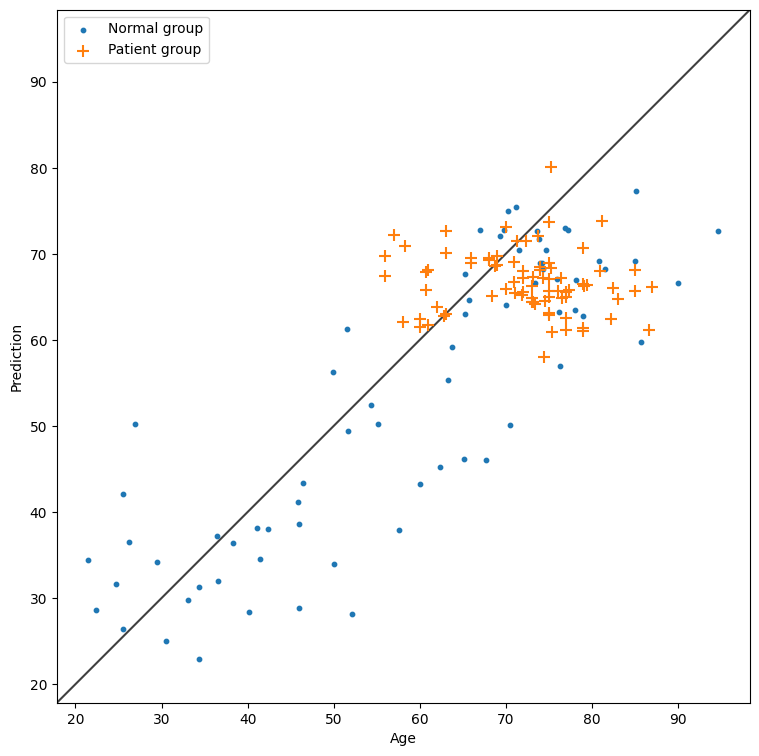

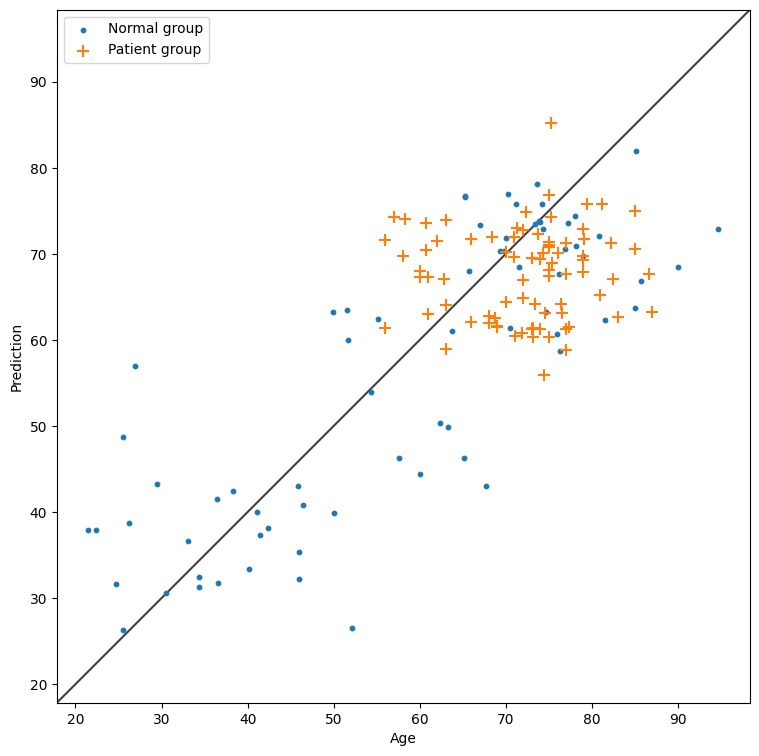

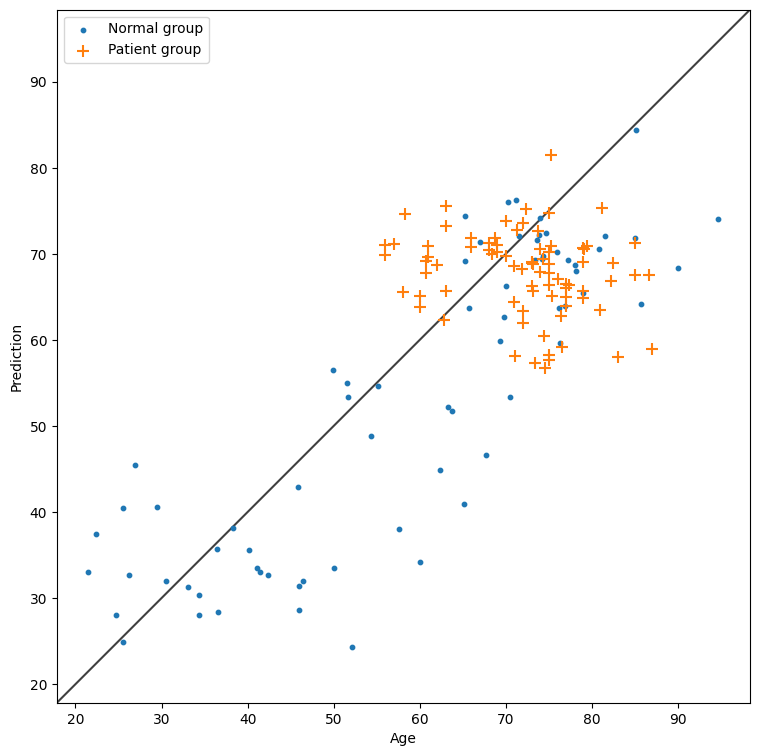

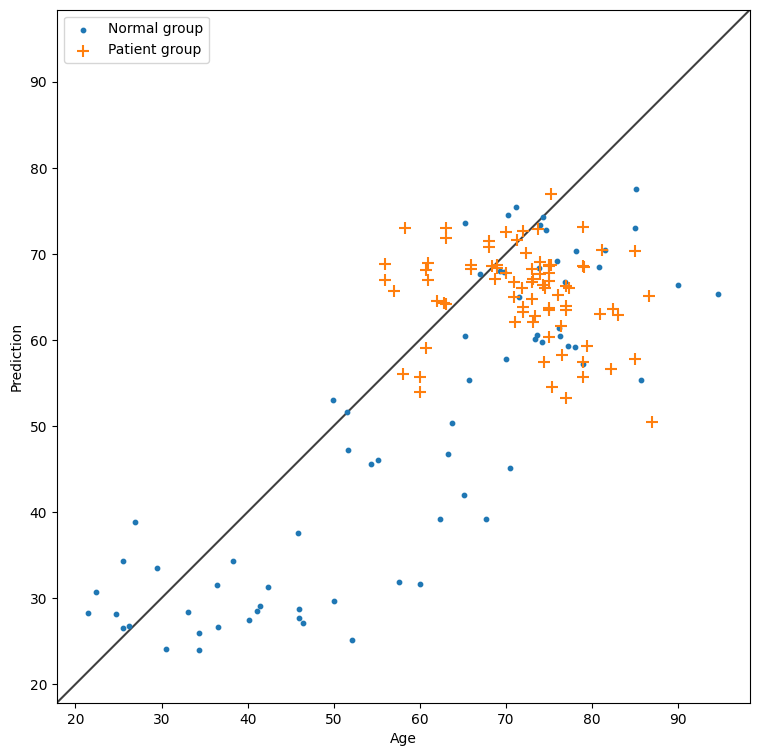

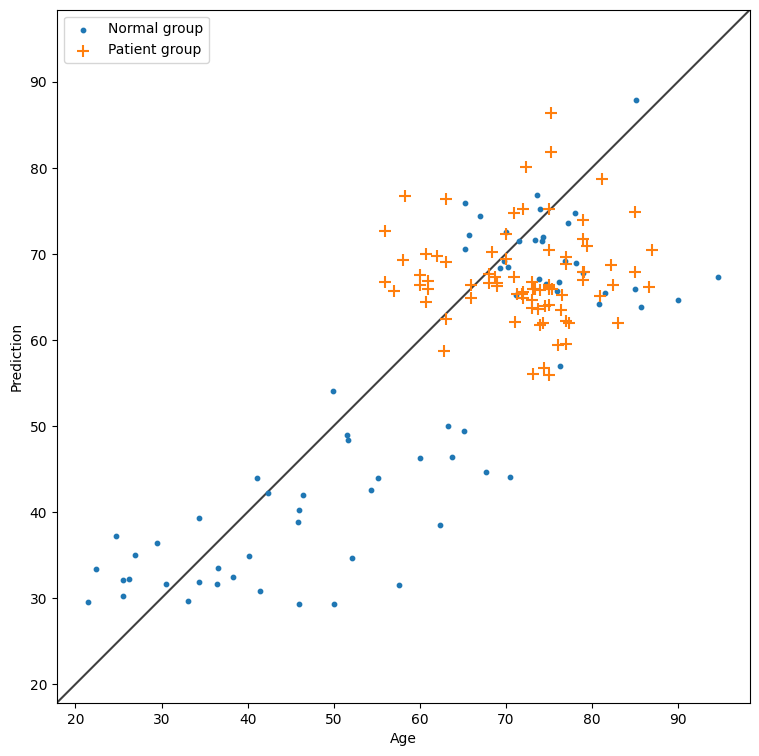

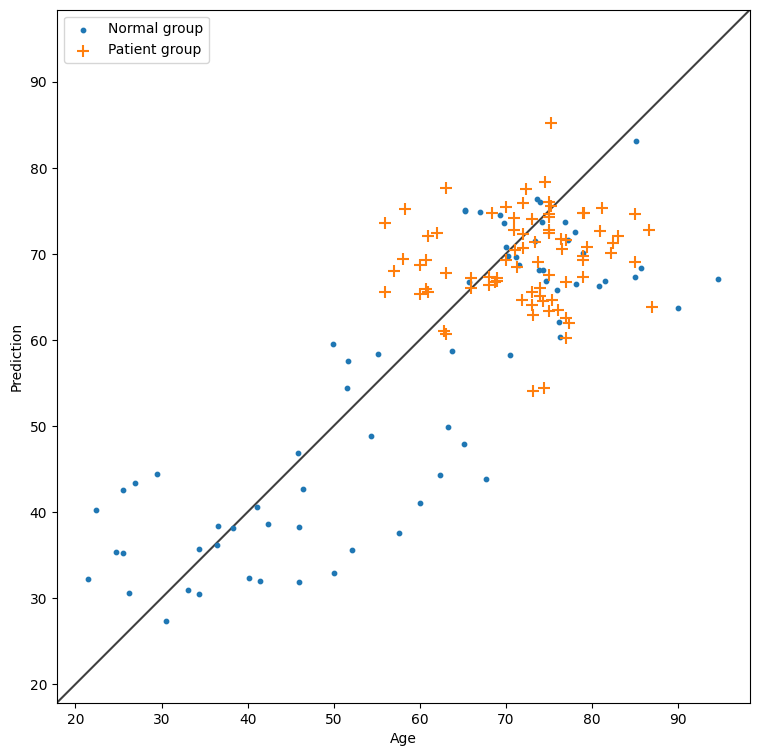

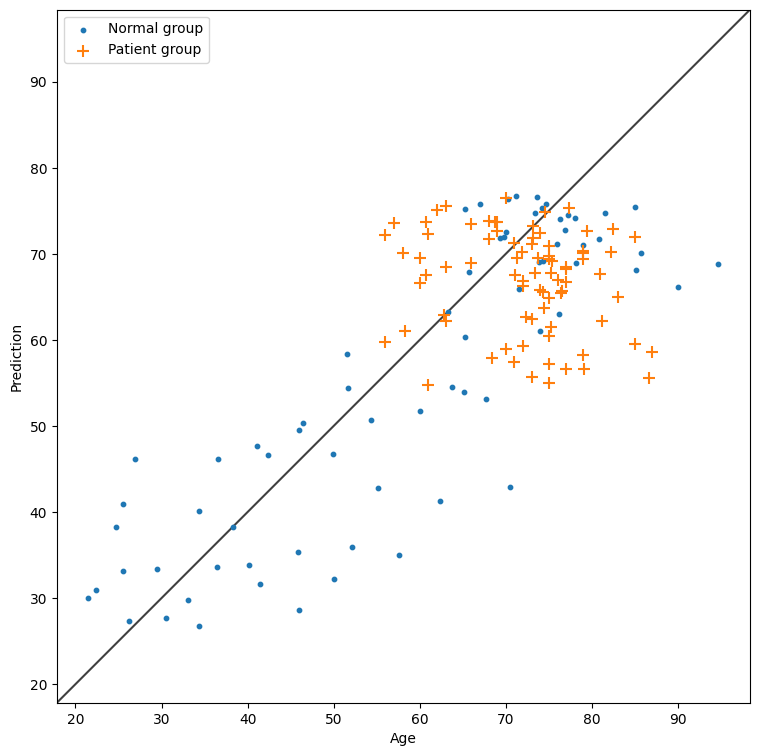

In [ ]:
for ind in range(10) : 
    binary_plot(
        normal_age, patient_age, 
        torch.concat([full_pred_list_list[ind][0:32], full_pred_list_list[ind][112:150]]) ,
        full_pred_list_list[ind][32:112], 
        title = f"{title}/binary_{ind}.png"
    )

# Section 5. Disease prediction

In [ ]:
#@title 4.1. Define age difference data

# pred_list_list
# normal_age_diff = torch.cat(pred_list_list).reshape(5, 70) - normal_age
# patient_age_diff = torch.cat(patient_pred_list_list).reshape(5,80) - patient_age
# print(torch.mean(normal_age_diff, axis = 1))
# print(torch.mean(patient_age_diff, axis = 1))

normal_age_diff_list = [pred - normal_age_torch for pred in normal_pred_list_list]
patient_age_diff_list = [pred - patient_age_torch for pred in patient_pred_list_list]
age_diff_list = [
    torch.cat([
        normal_age_diff_list[ind][0:32], 
        patient_age_diff_list[ind], 
        normal_age_diff_list[ind][32:70]
    ]) for ind in range(len(normal_pred_list_list))
]

age_diff_contrast_list = [pred - subject_age_torch for pred in full_pred_list_list]

In [ ]:
#@title 4.2. Define class data (torch tensor)

subj_binary = np.repeat([0, 1, 1, 1, 0], [32, 26, 22, 32, 38])
subj_ternary = np.repeat([0, 1, 1, 2, 0], [32, 26, 22, 32, 38])
subj_quaternary = np.repeat([0, 1, 2, 3, 0], [32, 26, 22, 32, 38])

subj_binary_torch = torch.tensor(subj_binary).int()
subj_ternary_torch = torch.tensor(subj_ternary).int()
subj_quaternary_torch = torch.tensor(subj_quaternary).int()

subj_binary_dataset_list = [MYTensorDataset(subject_data_torch, subj_binary_torch, subject_mmse_torch, subject_age_torch, age_diff) for age_diff in age_diff_list]
subj_ternary_dataset_list = [MYTensorDataset(subject_data_torch, subj_ternary_torch, subject_mmse_torch, subject_age_torch, age_diff) for age_diff in age_diff_list]
subj_quaternary_dataset_list = [MYTensorDataset(subject_data_torch, subj_quaternary_torch, subject_mmse_torch, subject_age_torch, age_diff) for age_diff in age_diff_list]

subj_binary_dataset_contrast_list = [MYTensorDataset(subject_data_torch, subj_binary_torch, subject_mmse_torch, subject_age_torch, age_diff) for age_diff in age_diff_contrast_list]
subj_ternary_dataset_contrast_list = [MYTensorDataset(subject_data_torch, subj_ternary_torch, subject_mmse_torch, subject_age_torch, age_diff) for age_diff in age_diff_contrast_list]
subj_quaternary_dataset_contrast_list = [MYTensorDataset(subject_data_torch, subj_quaternary_torch, subject_mmse_torch, subject_age_torch, age_diff) for age_diff in age_diff_contrast_list]


# seq_binary = np.repeat([0, 1, 1, 1, 0], [32*11, 26*11, 22*11, 32*11, 38*9])
# seq_ternary = np.repeat([0, 1, 1, 2, 0], [32*11, 26*11, 22*11, 32*11, 38*9])
# seq_quaternary = np.repeat([0, 1, 2, 3, 0], [32*11, 26*11, 22*11, 32*11, 38*9])

# seq_binary_torch = torch.tensor(seq_binary).float()
# seq_ternary_torch = torch.tensor(seq_ternary).float()
# seq_quaternary_torch = torch.tensor(seq_quaternary).float()

# seq_binary_dataset_list = [MYTensorDataset(seq_data_torch, seq_binary_torch, seq_mmse_torch, age_diff) for age_diff in age_diff_list]
# seq_ternary_dataset_list = [MYTensorDataset(seq_data_torch, seq_ternary_torch, seq_mmse_torch, age_diff) for age_diff in age_diff_list]
# seq_quaternary_dataset_list = [MYTensorDataset(seq_data_torch, subj_binary_torch, seq_mmse_torch, age_diff) for age_diff in age_diff_list]

In [ ]:
#@title 5.3. Define training function

from loss_230505 import Binary_module, NLL_module, Proposed_module, loss_generator

def disease_detection(full_dataset, module_type, DEVICE, ind_list, 
                      SEED = None, N = 150, K = 4, 
                      h_dim = 50, num_layers = 2, num_epoch = 200, batch_size = 8, 
                      loss_type = 'Proposed', weight = None, p_star = None, eps = 1e-8, 
                      learning_rate = 1e-3, weight_decay = 1e-2) : 

    if SEED is not None : 
        make_reproducibility(SEED)

    test_pred_list = torch.zeros([N, K])
    if K == 2 : 
        test_pred_list= torch.zeros(N)
        loss_type = 'Binary'    

    num_fold = len(ind_list)
    train_loss_list = [[] for _ in range(num_fold)]
    test_loss_list = [[] for _ in range(num_fold)]
    
    loss_function = loss_generator(DEVICE, loss_type, K, weight, p_star, eps)

    for fold in range(num_fold) : 
        print(f"{fold+1}th fold starting.")
        module = module_type(h_dim, num_layers, K).to(DEVICE)
        optimizer = optim.Adam(module.parameters(), lr=learning_rate, weight_decay = weight_decay)

        I1, I2 = ind_list[fold]
        train_dataset = torch.utils.data.Subset(full_dataset, indices=I1)       
        test_dataset = torch.utils.data.Subset(full_dataset, indices=I2)
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=I2.shape[0], shuffle=False)


        start = time.time()
        for epoch in tqdm(range(num_epoch)) : 

            module.train()
            for batch, (batch_data, batch_class, batch_mmse, batch_age, batch_age_diff) in enumerate(train_loader) : 

                batch_data = batch_data.to(DEVICE)
                batch_class = batch_class.to(DEVICE)
                batch_mmse = batch_mmse.to(DEVICE)
                batch_age = batch_age.to(DEVICE)
                batch_age_diff = batch_age_diff.to(DEVICE)

                optimizer.zero_grad()
                train_loss = loss_function(module(batch_data, batch_mmse, batch_age, batch_age_diff), batch_class)
                train_loss_list[fold].append(train_loss.item())

                train_loss.backward()
                optimizer.step()
            
            module.eval()
            for batch, (batch_data, batch_class, batch_mmse, batch_age, batch_age_diff) in enumerate(test_loader) :

                batch_data = batch_data.to(DEVICE)
                batch_class = batch_class.to(DEVICE)
                batch_mmse = batch_mmse.to(DEVICE)
                batch_age = batch_age.to(DEVICE)
                batch_age_diff = batch_age_diff.to(DEVICE)
                
                test_loss = loss_function(module(batch_data, batch_mmse, batch_age, batch_age_diff), batch_class)
                test_loss_list[fold].append(test_loss.item())

                if epoch == num_epoch - 1 : 
                    test_prediction = module(batch_data, batch_mmse, batch_age, batch_age_diff).detach().cpu()
        end = time.time()

        if K == 2 : 
            test_pred_list[I2] = test_prediction
        else :
            test_pred_list[I2] = test_prediction.squeeze(1)
    
    return test_pred_list, train_loss_list, test_loss_list

In [ ]:
#@title 5.4. Training

from model_230505 import binary_without_age_diff, binary_with_age_diff, multi_without_age_diff, multi_with_age_diff
from visualize_230505 import loss_plot2

# learning_rate = 2e-3
# weight_decay = 1e-2
# num_epoch = 200
# subj_batch_size = 8
# seq_batch_size = 32

# seed_list = [3000 + 100 * (i+1) for i in range(10)]
# h_dim = 28
# num_layers = 1

# title = "subj_disease_binary"
# os.makedirs(f'{title}', exist_ok=True)
# os.makedirs(f'{title}/model1', exist_ok=True)
# os.makedirs(f'{title}/model2', exist_ok=True)
# os.makedirs(f'{title}/model3', exist_ok=True)

# model1_pred_list_list = []
# model1_train_loss_list_list = []
# model1_test_loss_list_list = []
# model2_pred_list_list = []
# model2_train_loss_list_list = []
# model2_test_loss_list_list = []
# model3_pred_list_list = []
# model3_train_loss_list_list = []
# model3_test_loss_list_list = []

# for ind in range(10) : 
#     result1 = disease_detection(
#         subj_binary_dataset_list[ind], binary_without_age_diff, DEVICE, subj_ind_list, 
#         SEED = seed_list[ind], N = 150, K = 2, 
#         h_dim = h_dim, num_layers = num_layers, num_epoch = num_epoch, batch_size = subj_batch_size, 
#         loss_type = 'Binary',
#         learning_rate = learning_rate, weight_decay = weight_decay
#     )
#     result2 = disease_detection(
#         subj_binary_dataset_list[ind], binary_with_age_diff, DEVICE, subj_ind_list, 
#         SEED = seed_list[ind], N = 150, K = 2, 
#         h_dim = h_dim, num_layers = num_layers, num_epoch = num_epoch, batch_size = subj_batch_size, 
#         loss_type = 'Binary',
#         learning_rate = learning_rate, weight_decay = weight_decay
#     )
#     result3 = disease_detection(
#         subj_binary_dataset_contrast_list[ind], binary_with_age_diff, DEVICE, subj_ind_list, 
#         SEED = seed_list[ind], N = 150, K = 2, 
#         h_dim = h_dim, num_layers = num_layers, num_epoch = num_epoch, batch_size = subj_batch_size, 
#         loss_type = 'Binary',
#         learning_rate = learning_rate, weight_decay = weight_decay
#     )
#     model1_pred_list_list.append(result1[0])
#     model1_train_loss_list_list.append(result1[1])
#     model1_test_loss_list_list.append(result1[2])

#     model2_pred_list_list.append(result2[0])
#     model2_train_loss_list_list.append(result2[1])
#     model2_test_loss_list_list.append(result2[2])

#     model3_pred_list_list.append(result3[0])
#     model3_train_loss_list_list.append(result3[1])
#     model3_test_loss_list_list.append(result3[2])
    
#     loss_plot2(result1, num_fold, h_dim, num_layers, num_epoch, learning_rate, seed_list[ind], title = f'{title}/model1')
#     loss_plot2(result2, num_fold, h_dim, num_layers, num_epoch, learning_rate, seed_list[ind], title = f'{title}/model2')
#     loss_plot2(result3, num_fold, h_dim, num_layers, num_epoch, learning_rate, seed_list[ind], title = f'{title}/model3')


# np.savetxt(f'{title}/model1/pred.csv', torch.concat(model1_pred_list_list).numpy(), delimiter = ",")
# np.savetxt(f'{title}/model1/train_loss.csv', np.asarray(model1_train_loss_list_list).mean(axis = 1), delimiter = ",")
# np.savetxt(f'{title}/model1/test_loss.csv', np.asarray(model1_test_loss_list_list).mean(axis = 1), delimiter = ",")

# np.savetxt(f'{title}/model2/pred.csv', torch.concat(model2_pred_list_list).numpy(), delimiter = ",")
# np.savetxt(f'{title}/model2/train_loss.csv', np.asarray(model2_train_loss_list_list).mean(axis = 1), delimiter = ",")
# np.savetxt(f'{title}/model2/test_loss.csv', np.asarray(model2_test_loss_list_list).mean(axis = 1), delimiter = ",")

# np.savetxt(f'{title}/model3/pred.csv', torch.concat(model3_pred_list_list).numpy(), delimiter = ",")
# np.savetxt(f'{title}/model3/train_loss.csv', np.asarray(model3_train_loss_list_list).mean(axis = 1), delimiter = ",")
# np.savetxt(f'{title}/model3/test_loss.csv', np.asarray(model3_test_loss_list_list).mean(axis = 1), delimiter = ",")


In [ ]:
#@ title 5.5. load data

title = "subj_disease_binary"
model1_pred_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/model1/pred.csv', header = None))).float()
model2_pred_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/model2/pred.csv', header = None))).float()
model3_pred_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/model3/pred.csv', header = None))).float()

model1_pred_list_list = [model1_pred_list_list[(150*ind) : (150 * ind + 150)].squeeze(1) for ind in range(10)]
model2_pred_list_list = [model2_pred_list_list[(150*ind) : (150 * ind + 150)].squeeze(1) for ind in range(10)]
model3_pred_list_list = [model3_pred_list_list[(150*ind) : (150 * ind + 150)].squeeze(1) for ind in range(10)]

In [ ]:
from util_230505 import make_binary_decision, contingency_table, binary_accuracy, make_decision, multiclass_accuracy

model1_pred_list_list[0]

decision1 = [make_binary_decision(pred) for pred in model1_pred_list_list]
decision2 = [make_binary_decision(pred) for pred in model2_pred_list_list]
decision3 = [make_binary_decision(pred) for pred in model3_pred_list_list]

acc1 = [binary_accuracy(pred, subj_binary_torch) for pred in model1_pred_list_list]
acc2 = [binary_accuracy(pred, subj_binary_torch) for pred in model2_pred_list_list]
acc3 = [binary_accuracy(pred, subj_binary_torch) for pred in model3_pred_list_list]

print([contingency_table(dec, subj_binary_torch, K = 2) for dec in decision1])
print([contingency_table(dec, subj_binary_torch, K = 2) for dec in decision2])
print([contingency_table(dec, subj_binary_torch, K = 2) for dec in decision3])

print(acc1)
print(acc2)
print(acc3)
print(sum(acc1))
print(sum(acc2))
print(sum(acc3))

[tensor([[53., 17.],
        [ 2., 78.]]), tensor([[49., 21.],
        [ 1., 79.]]), tensor([[52., 18.],
        [ 0., 80.]]), tensor([[60., 10.],
        [ 1., 79.]]), tensor([[60., 10.],
        [ 2., 78.]]), tensor([[61.,  9.],
        [ 1., 79.]]), tensor([[60., 10.],
        [ 0., 80.]]), tensor([[60., 10.],
        [ 5., 75.]]), tensor([[61.,  9.],
        [22., 58.]]), tensor([[45., 25.],
        [ 2., 78.]])]
[tensor([[60., 10.],
        [ 2., 78.]]), tensor([[65.,  5.],
        [34., 46.]]), tensor([[62.,  8.],
        [21., 59.]]), tensor([[54., 16.],
        [22., 58.]]), tensor([[59., 11.],
        [ 3., 77.]]), tensor([[47., 23.],
        [ 1., 79.]]), tensor([[45., 25.],
        [ 2., 78.]]), tensor([[62.,  8.],
        [ 2., 78.]]), tensor([[62.,  8.],
        [ 1., 79.]]), tensor([[40., 30.],
        [ 4., 76.]])]
[tensor([[58., 12.],
        [ 0., 80.]]), tensor([[31., 39.],
        [32., 48.]]), tensor([[60., 10.],
        [21., 59.]]), tensor([[63.,  7.],
        [24

In [ ]:
#@title 5.4. Training

# learning_rate = 2e-4
# weight_decay = 5e-3
# num_epoch = 100
# subj_batch_size = 8
# # seq_batch_size = 32

# seed_list = [4000 + 100 * (i+1) for i in range(10)]
# h_dim = 24
# num_layers = 1

# title = "subj_disease_ternary"
# os.makedirs(f'{title}', exist_ok=True)
# os.makedirs(f'{title}/model1', exist_ok=True)
# os.makedirs(f'{title}/model2', exist_ok=True)
# os.makedirs(f'{title}/model3', exist_ok=True)

# ternary_1_pred_list_list = []
# ternary_1_train_loss_list_list = []
# ternary_1_test_loss_list_list = []
# ternary_2_pred_list_list = []
# ternary_2_train_loss_list_list = []
# ternary_2_test_loss_list_list = []
# ternary_3_pred_list_list = []
# ternary_3_train_loss_list_list = []
# ternary_3_test_loss_list_list = []

# for ind in range(10) : 
#     result1 = disease_detection(
#         subj_ternary_dataset_list[ind], multi_without_age_diff, DEVICE, subj_ind_list, 
#         SEED = seed_list[ind], N = 150, K = 3, 
#         h_dim = h_dim, num_layers = num_layers, num_epoch = num_epoch, batch_size = subj_batch_size, 
#         loss_type = 'Proposed', weight = None, p_star = None, eps = 1e-8, 
#         learning_rate = learning_rate, weight_decay = weight_decay
#     )
#     result2 = disease_detection(
#         subj_ternary_dataset_list[ind], multi_with_age_diff, DEVICE, subj_ind_list, 
#         SEED = seed_list[ind], N = 150, K = 3, 
#         h_dim = h_dim, num_layers = num_layers, num_epoch = num_epoch, batch_size = subj_batch_size, 
#         loss_type = 'Proposed', weight = None, p_star = None, eps = 1e-8, 
#         learning_rate = learning_rate, weight_decay = weight_decay
#     )
#     result3 = disease_detection(
#         subj_ternary_dataset_contrast_list[ind], multi_with_age_diff, DEVICE, subj_ind_list, 
#         SEED = seed_list[ind], N = 150, K = 3, 
#         h_dim = h_dim, num_layers = num_layers, num_epoch = num_epoch, batch_size = subj_batch_size, 
#         loss_type = 'Proposed', weight = None, p_star = None, eps = 1e-8, 
#         learning_rate = learning_rate, weight_decay = weight_decay
#     )
#     ternary_1_pred_list_list.append(result1[0])
#     ternary_1_train_loss_list_list.append(result1[1])
#     ternary_1_test_loss_list_list.append(result1[2])

#     ternary_2_pred_list_list.append(result2[0])
#     ternary_2_train_loss_list_list.append(result2[1])
#     ternary_2_test_loss_list_list.append(result2[2])

#     ternary_3_pred_list_list.append(result3[0])
#     ternary_3_train_loss_list_list.append(result3[1])
#     ternary_3_test_loss_list_list.append(result3[2])
    
#     loss_plot2(result1, num_fold, h_dim, num_layers, num_epoch, learning_rate, seed_list[ind], title = f'{title}/model1')
#     loss_plot2(result2, num_fold, h_dim, num_layers, num_epoch, learning_rate, seed_list[ind], title = f'{title}/model2')
#     loss_plot2(result3, num_fold, h_dim, num_layers, num_epoch, learning_rate, seed_list[ind], title = f'{title}/model3')


# np.savetxt(f'{title}/model1/pred.csv', torch.concat(ternary_1_pred_list_list).numpy(), delimiter = ",")
# np.savetxt(f'{title}/model1/train_loss.csv', np.asarray(ternary_1_train_loss_list_list).mean(axis = 1), delimiter = ",")
# np.savetxt(f'{title}/model1/test_loss.csv', np.asarray(ternary_1_test_loss_list_list).mean(axis = 1), delimiter = ",")

# np.savetxt(f'{title}/model2/pred.csv', torch.concat(ternary_2_pred_list_list).numpy(), delimiter = ",")
# np.savetxt(f'{title}/model2/train_loss.csv', np.asarray(ternary_2_train_loss_list_list).mean(axis = 1), delimiter = ",")
# np.savetxt(f'{title}/model2/test_loss.csv', np.asarray(ternary_2_test_loss_list_list).mean(axis = 1), delimiter = ",")

# np.savetxt(f'{title}/model3/diff_pred.csv', torch.concat(ternary_3_pred_list_list).numpy(), delimiter = ",")
# np.savetxt(f'{title}/model3/train_loss.csv', np.asarray(ternary_3_train_loss_list_list).mean(axis = 1), delimiter = ",")
# np.savetxt(f'{title}/model3/test_loss.csv', np.asarray(ternary_3_test_loss_list_list).mean(axis = 1), delimiter = ",")


In [ ]:

title = "subj_disease_ternary"

ternary_1_pred_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/model1/pred.csv', header = None))).float()
ternary_2_pred_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/model2/pred.csv', header = None))).float()
ternary_3_pred_list_list = torch.tensor(np.array(pd.read_csv(f'{title}/model3/pred.csv', header = None))).float()

ternary_1_pred_list_list = [ternary_1_pred_list_list[(150*ind) : (150 * ind + 150)] for ind in range(10)]
ternary_2_pred_list_list = [ternary_2_pred_list_list[(150*ind) : (150 * ind + 150)] for ind in range(10)]
ternary_3_pred_list_list = [ternary_3_pred_list_list[(150*ind) : (150 * ind + 150)] for ind in range(10)]


torch.Size([150, 3])

In [ ]:
from util_230505 import make_binary_decision, contingency_table, binary_accuracy, make_decision, multiclass_accuracy

ternary_decision1 = [make_decision(pred, K=3) for pred in ternary_1_pred_list_list]
ternary_decision2 = [make_decision(pred, K=3) for pred in ternary_2_pred_list_list]
ternary_decision3 = [make_decision(pred, K=3) for pred in ternary_3_pred_list_list]

ternary_3_pred_list_list

ternary_acc1 = [multiclass_accuracy(dec, subj_ternary_torch) for dec in ternary_decision1]
ternary_acc2 = [multiclass_accuracy(dec, subj_ternary_torch) for dec in ternary_decision2]
ternary_acc3 = [multiclass_accuracy(dec, subj_ternary_torch) for dec in ternary_decision3]

print([contingency_table(dec, subj_ternary_torch, K = 3) for dec in ternary_decision1])
print([contingency_table(dec, subj_ternary_torch, K = 3) for dec in ternary_decision2])
print([contingency_table(dec, subj_ternary_torch, K = 3) for dec in ternary_decision3])

print(ternary_acc1)
print(min(ternary_acc1))
print(sum(ternary_acc1) / 10)
print(max(ternary_acc1))

print(ternary_acc2)
print(min(ternary_acc2))
print(sum(ternary_acc2) / 10)
print(max(ternary_acc2))
print(ternary_acc3)
print(min(ternary_acc3))
print(sum(ternary_acc3) / 10)
print(max(ternary_acc3))

[tensor([[57., 12.,  1.],
        [ 4., 39.,  5.],
        [ 3., 28.,  1.]]), tensor([[61.,  9.,  0.],
        [ 2., 42.,  4.],
        [ 1., 29.,  2.]]), tensor([[61.,  7.,  2.],
        [ 4., 42.,  2.],
        [ 1., 26.,  5.]]), tensor([[60.,  5.,  5.],
        [ 3., 39.,  6.],
        [ 2., 19., 11.]]), tensor([[58.,  9.,  3.],
        [ 3., 42.,  3.],
        [ 6., 20.,  6.]]), tensor([[60.,  9.,  1.],
        [ 2., 41.,  5.],
        [ 6., 18.,  8.]]), tensor([[61.,  7.,  2.],
        [ 3., 40.,  5.],
        [ 3., 21.,  8.]]), tensor([[63.,  5.,  2.],
        [ 4., 37.,  7.],
        [ 4., 23.,  5.]]), tensor([[61.,  7.,  2.],
        [ 0., 44.,  4.],
        [ 1., 28.,  3.]]), tensor([[63.,  5.,  2.],
        [ 6., 38.,  4.],
        [ 4., 23.,  5.]])]
[tensor([[59.,  8.,  3.],
        [ 4., 41.,  3.],
        [ 7., 22.,  3.]]), tensor([[63.,  7.,  0.],
        [ 1., 45.,  2.],
        [ 4., 25.,  3.]]), tensor([[58., 10.,  2.],
        [ 3., 41.,  4.],
        [ 1., 22.,  9.]]

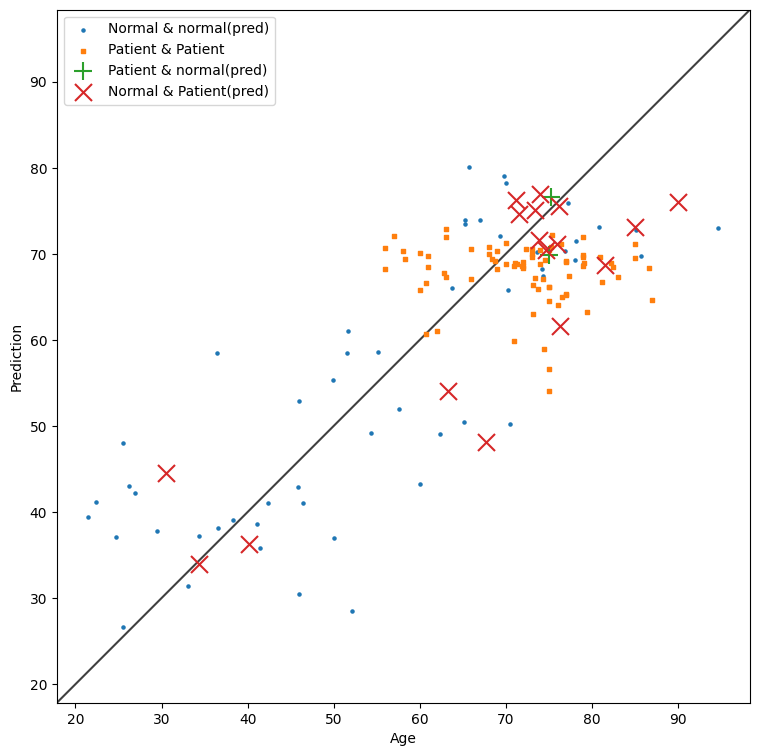

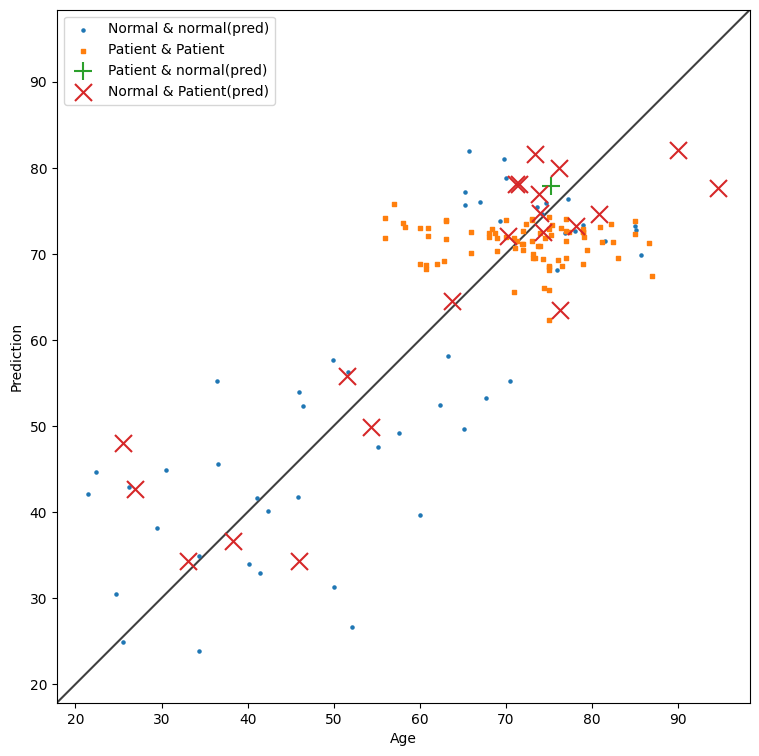

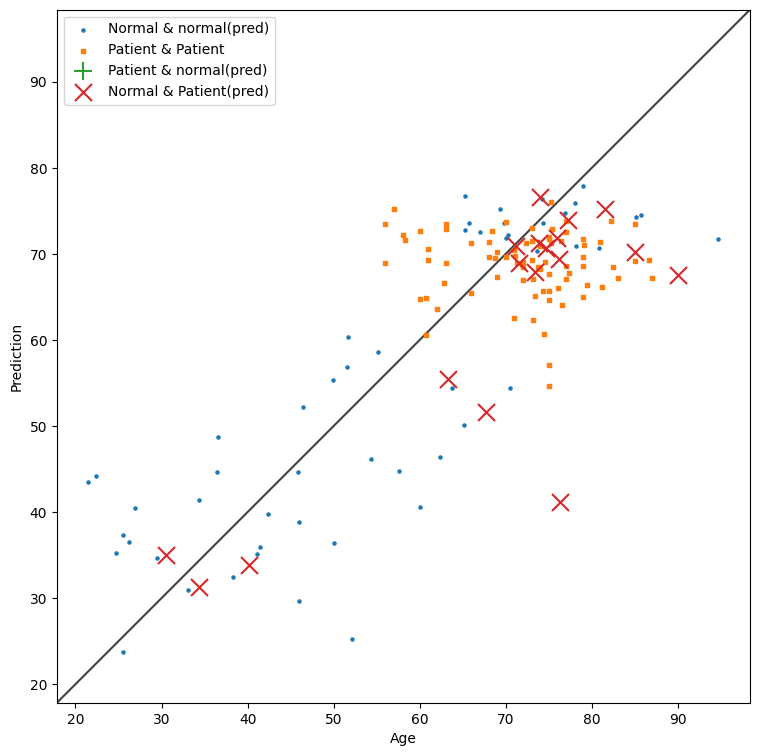

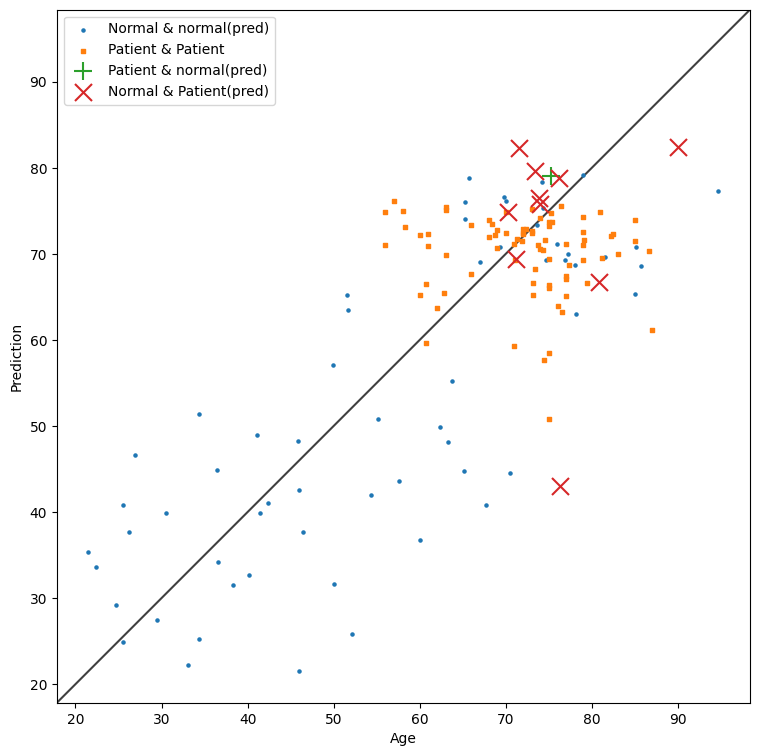

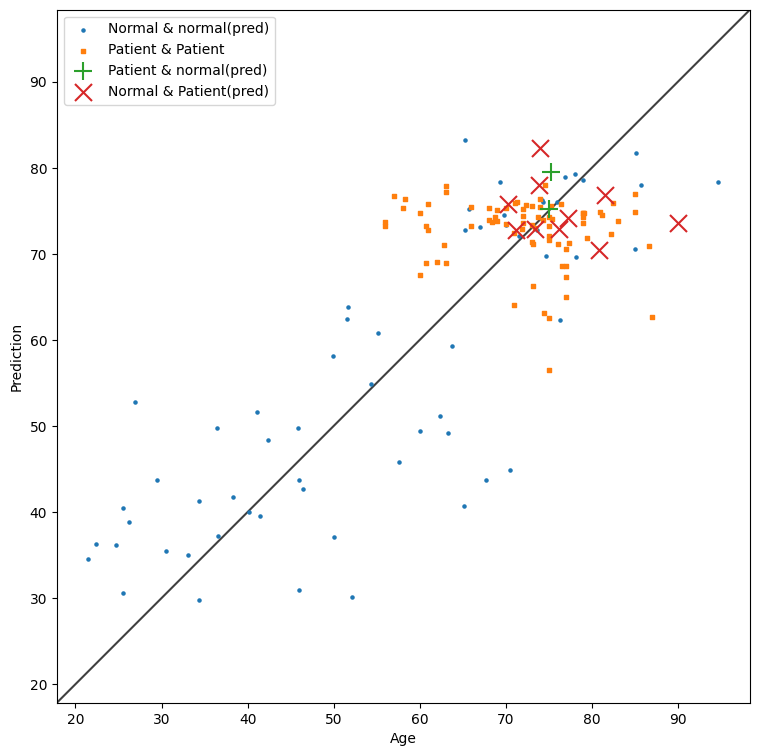

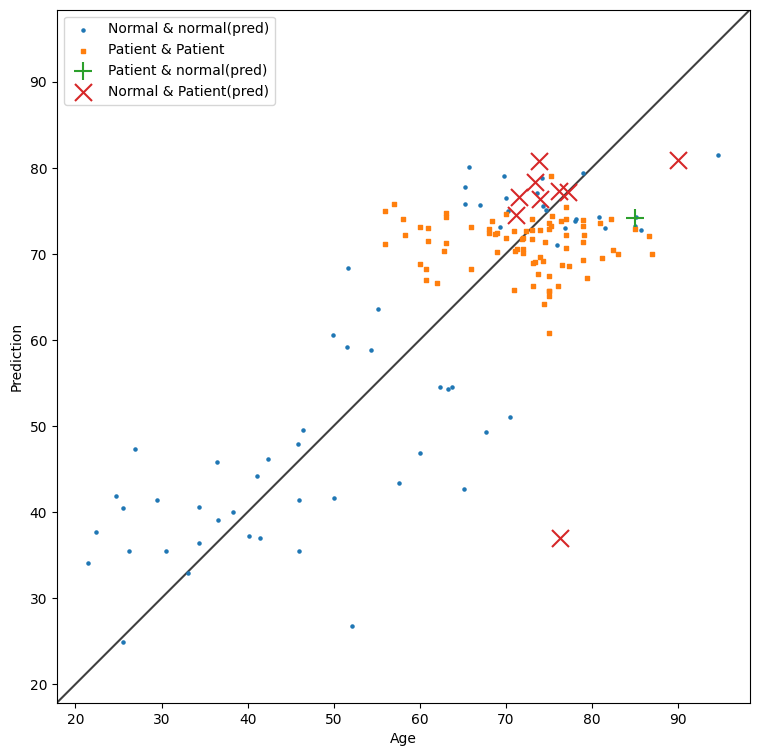

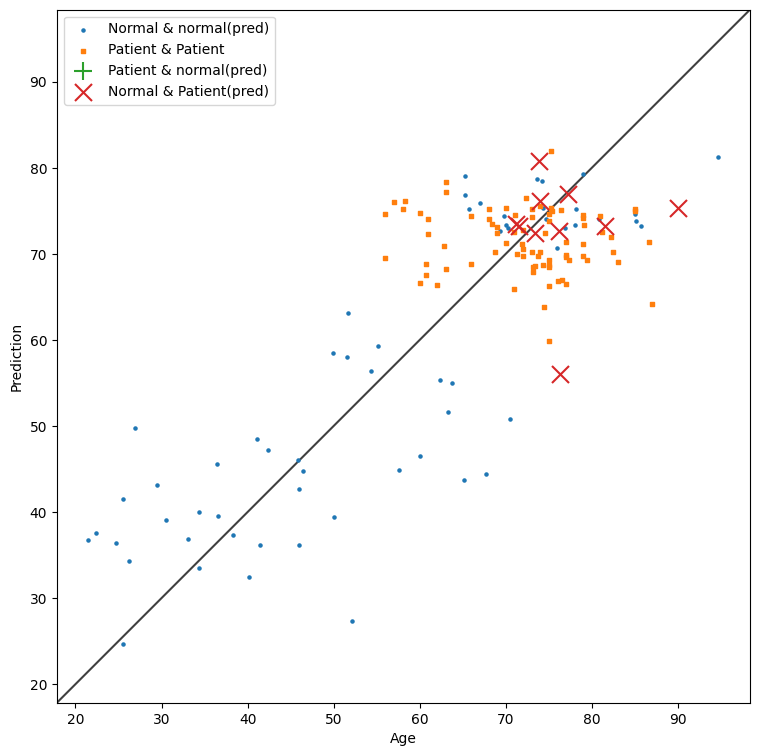

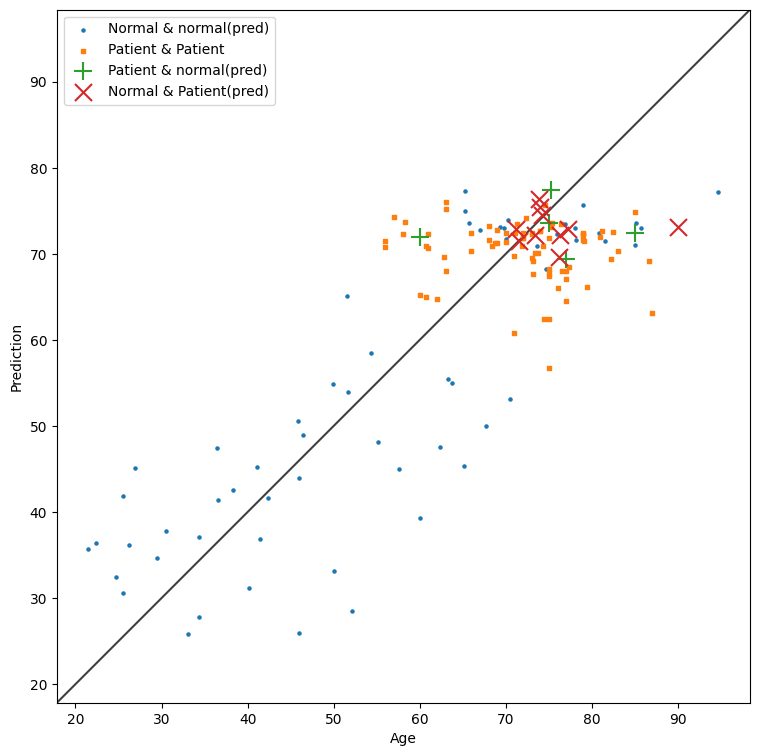

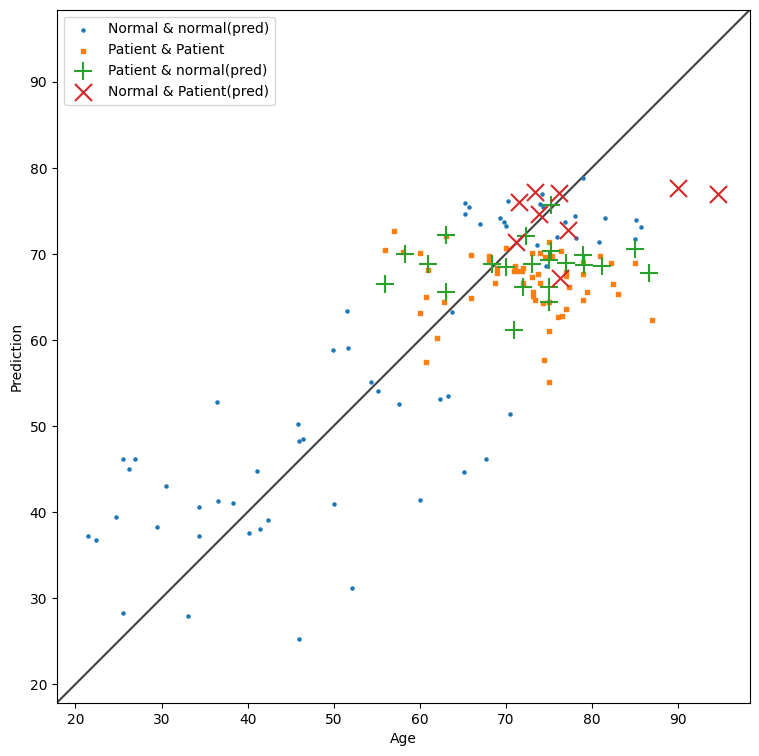

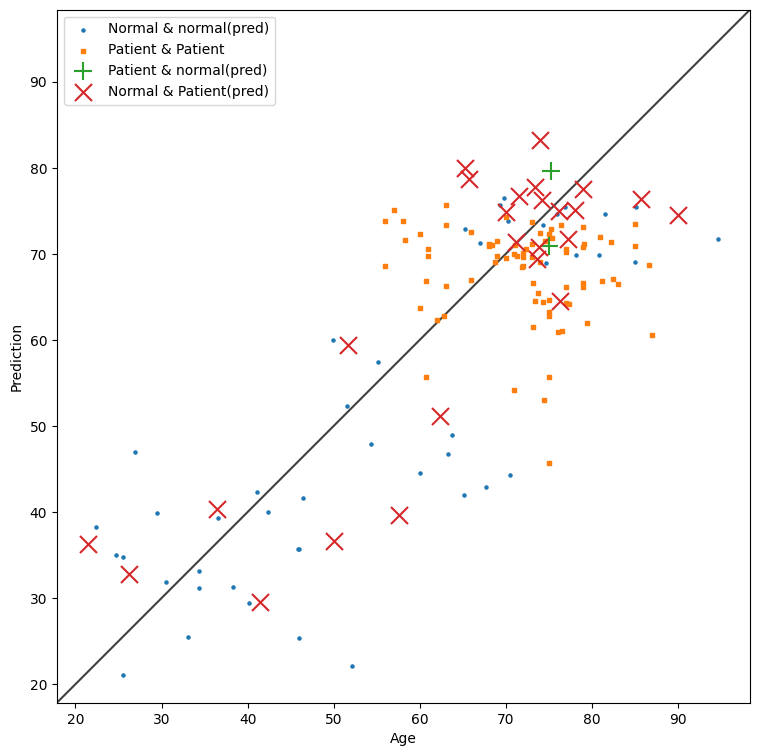

In [ ]:


title = "subj_disease_binary"
age_pred_list = [
    torch.cat([
        normal_pred_list_list[ind][0:32], 
        patient_pred_list_list[ind], 
        normal_pred_list_list[ind][32:70]
    ]) for ind in range(len(normal_pred_list_list))
]

for ind in range(10) : 
    dec = decision1[ind]
    leg = [
        'Normal & normal(pred)', 
        'Patient & normal(pred)',
        'Normal & Patient(pred)', 
        'Patient & Patient'
    ]

    fig, ax = plt.subplots(figsize = (12,9))
    plt.scatter(subject_age[np.where(np.logical_and(dec == 0, subj_binary == 0))], 
            age_pred_list[ind].numpy()[np.where(np.logical_and(dec == 0, subj_binary == 0))], 
            label = leg[0], s=5, zorder=10, marker = "o")
    plt.scatter(subject_age[np.where(np.logical_and(dec == 1, subj_binary == 1))], 
            age_pred_list[ind].numpy()[np.where(np.logical_and(dec == 1, subj_binary == 1))], 
            label = leg[3], s=5, zorder=10, marker = "s")
    plt.scatter(subject_age[np.where(np.logical_and(dec == 0, subj_binary == 1))], 
            age_pred_list[ind].numpy()[np.where(np.logical_and(dec == 0, subj_binary == 1))], 
            label = leg[1], s=150, zorder=10, marker = "+")
    plt.scatter(subject_age[np.where(np.logical_and(dec == 1, subj_binary == 0))], 
            age_pred_list[ind].numpy()[np.where(np.logical_and(dec == 1, subj_binary == 0))], 
            label = leg[2], s=150, zorder=10, marker = "x")
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    plt.xlabel("Age")
    plt.ylabel("Prediction")
    plt.legend()

    plt.savefig(f'{title}/binary_classification_{ind}.png')
    plt.show()



In [ ]:
# plt.hist(normal_age_diff, density = True, bins = 30, alpha = 0.5, label = 'Normal group')
# plt.hist(patient_age_diff, density = True, bins = 30, alpha = 0.5, label = 'Patient group')

# plt.legend()
# plt.savefig("Histogram_diff.png")
# plt.show()

# from scipy import stats
# t_stat, p_val = stats.ttest_ind(normal_age_diff, patient_age_diff, equal_var = False, alternative = 'less')

# print(t_stat)
# print(p_val)

# print(torch.mean(normal_age_diff))
# print(torch.mean(patient_age_diff))
# print(torch.mean(patient_age_diff[0:48]))
# print(torch.mean(patient_age_diff[48:80]))
# print(torch.var(normal_age_diff))
# print(torch.var(patient_age_diff[0:48]))
# print(torch.var(patient_age_diff[48:80]))

# print(torch.mean(normal_age_diff**2))
# print(torch.mean(patient_age_diff**2))
# print(torch.mean(patient_age_diff[0:48]**2))
# print(torch.mean(patient_age_diff[48:80]**2))

In [ ]:
#@title Patient prediction start


# subject_bin = np.repeat([0, 1, 1, 1, 0], [32, 26, 22, 32, 38])
# # subject_tri = np.repeat([0, 1, 2, 2, 0], [32, 26, 22, 32, 38])
# subject_mci = np.repeat([0, 1, 1, 2, 0], [32, 26, 22, 32, 38])
# subject_full = np.repeat([0, 1, 2, 3, 0], [32, 26, 22, 32, 38])


# semi_class = np.repeat([0, 1, 2, 3, 0], [32 * 11, 26 * 11, 22 * 11, 32 * 11, 38 * 9])


# subject_bin_dataset = MYTensorDataset(subject_data_torch, subject_bin_torch, subject_age_torch, subject_mmse_torch)
# subject_tri_dataset = MYTensorDataset(subject_data_torch, subject_tri_torch, subject_age_torch, subject_mmse_torch)
# subject_full_dataset = MYTensorDataset(subject_data_torch, subject_full_torch, subject_age_torch, subject_mmse_torch)